In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jayaantanaath_student_habits_vs_academic_performance_path = kagglehub.dataset_download('jayaantanaath/student-habits-vs-academic-performance')

print('Data source import complete.')


Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/student_habits_performance.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student_habits_performance.csv')
df.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [ ]:
df['recreational_screen_time'] = df['social_media_hours'] + df['netflix_hours']
df['recreational_screen_study_ratio'] = np.where(
    df['study_hours_per_day'] > 0,
    df['recreational_screen_time'] / df['study_hours_per_day'],
    np.inf  # Opcional: usar np.nan si prefieres
)

In [ ]:
df.drop(['student_id'],axis=1,inplace=True)

In [ ]:
bins = [0, 20, 40, 60, 80, 101]
labels = [1, 2, 3, 4, 5]

df['score_category'] = pd.cut(
    df['exam_score'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)
df['score_category'] = df['score_category'].astype(int)


In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# Configuración inicial
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
genders = ['Male', 'Female', 'Other']  # Ajustar según tus datos reales
stats = ['mean', 'median', 'mode', 'min', 'max', 'std']

# Paso 1: Calcular todas las estadísticas por género
results = {}
for gender in genders:
    subset = df[df['gender'] == gender][numeric_vars]

    stats_results = {
        f'{gender}_{stat}': getattr(subset, stat)()
        if stat != 'mode'
        else subset.mode().iloc[0] if not subset.mode().empty else pd.Series([None]*len(numeric_vars), index=numeric_vars)
        for stat in stats
    }

    results[gender] = pd.DataFrame(stats_results)

# Paso 2: Combinar horizontalmente
combined = pd.concat(results.values(), axis=1)

# Paso 3: Reordenar columnas por tipo de estadística
column_order = [
    f'{gender}_{stat}'
    for stat in stats
    for gender in genders
]

final_table = combined[column_order].round(2)
final_table.index.name = 'Variable'
final_table

Male_mean  Female_mean  Other_mean  \
Variable                                                              
age                                  20.56        20.42       20.67   
study_hours_per_day                   3.51         3.58        3.61   
social_media_hours                    2.50         2.50        2.59   
netflix_hours                         1.82         1.80        2.06   
attendance_percentage                83.89        84.37       84.08   
sleep_hours                           6.44         6.47        6.80   
exercise_frequency                    3.19         2.91        2.95   
mental_health_rating                  5.42         5.45        5.48   
exam_score                           69.37        69.74       70.65   
recreational_screen_time              4.32         4.30        4.65   
recreational_screen_study_ratio        inf          inf        1.46   
score_category                        3.95         3.96        4.00   

                                 Male_median  Female_median  Other_median  \
Variable                                                                    
age                                    21.00          20.00         21.00   
study_hours_per_day                     3.50           3.60          3.50   
social_media_hours                      2.50           2.50          2.45   
netflix_hours                           1.80           1.80          2.05   
attendance_percentage                  83.90          84.80         83.55   
sleep_hours                             6.50           6.40          6.75   
exercise_frequency                      3.00           3.00          3.00   
mental_health_rating                    5.00           5.00          5.50   
exam_score                             70.20          70.70         69.00   
recreational_screen_time                4.40           4.30          4.70   
recreational_screen_study_ratio         1.25           1.22          1.23   
score_category                          4.00           4.00          4.00   

                                 Male_mode  Female_mode  Other_mode  Male_min  \
Variable                                                                        
age                                   24.0         20.0       20.00     17.00   
study_hours_per_day                    3.5          3.2        2.70      0.00   
social_media_hours                     3.1          3.0        2.20      0.00   
netflix_hours                          0.0          2.0        0.30      0.00   
attendance_percentage                100.0        100.0      100.00     59.70   
sleep_hours                            6.2          6.1        6.60      3.30   
exercise_frequency                     3.0          0.0        0.00      0.00   
mental_health_rating                   6.0          1.0        3.00      1.00   
exam_score                           100.0        100.0       56.40     23.10   
recreational_screen_time               5.0          4.4        1.80      0.20   
recreational_screen_study_ratio        1.0          inf        0.31      0.04   
score_category                         4.0          4.0        4.00      2.00   

                                 Female_min  Other_min  Male_max  Female_max  \
Variable                                                                       
age                                   17.00      17.00      24.0        24.0   
study_hours_per_day                    0.00       1.50       8.3         7.6   
social_media_hours                     0.00       0.00       7.2         6.2   
netflix_hours                          0.00       0.00       4.9         5.4   
attendance_percentage                 56.00      62.00     100.0       100.0   
sleep_hours                            3.20       5.00      10.0        10.0   
exercise_frequency                     0.00       0.00       6.0         6.0   
mental_health_rating                   1.00       1.00      10.0        10.0   
exam_score              

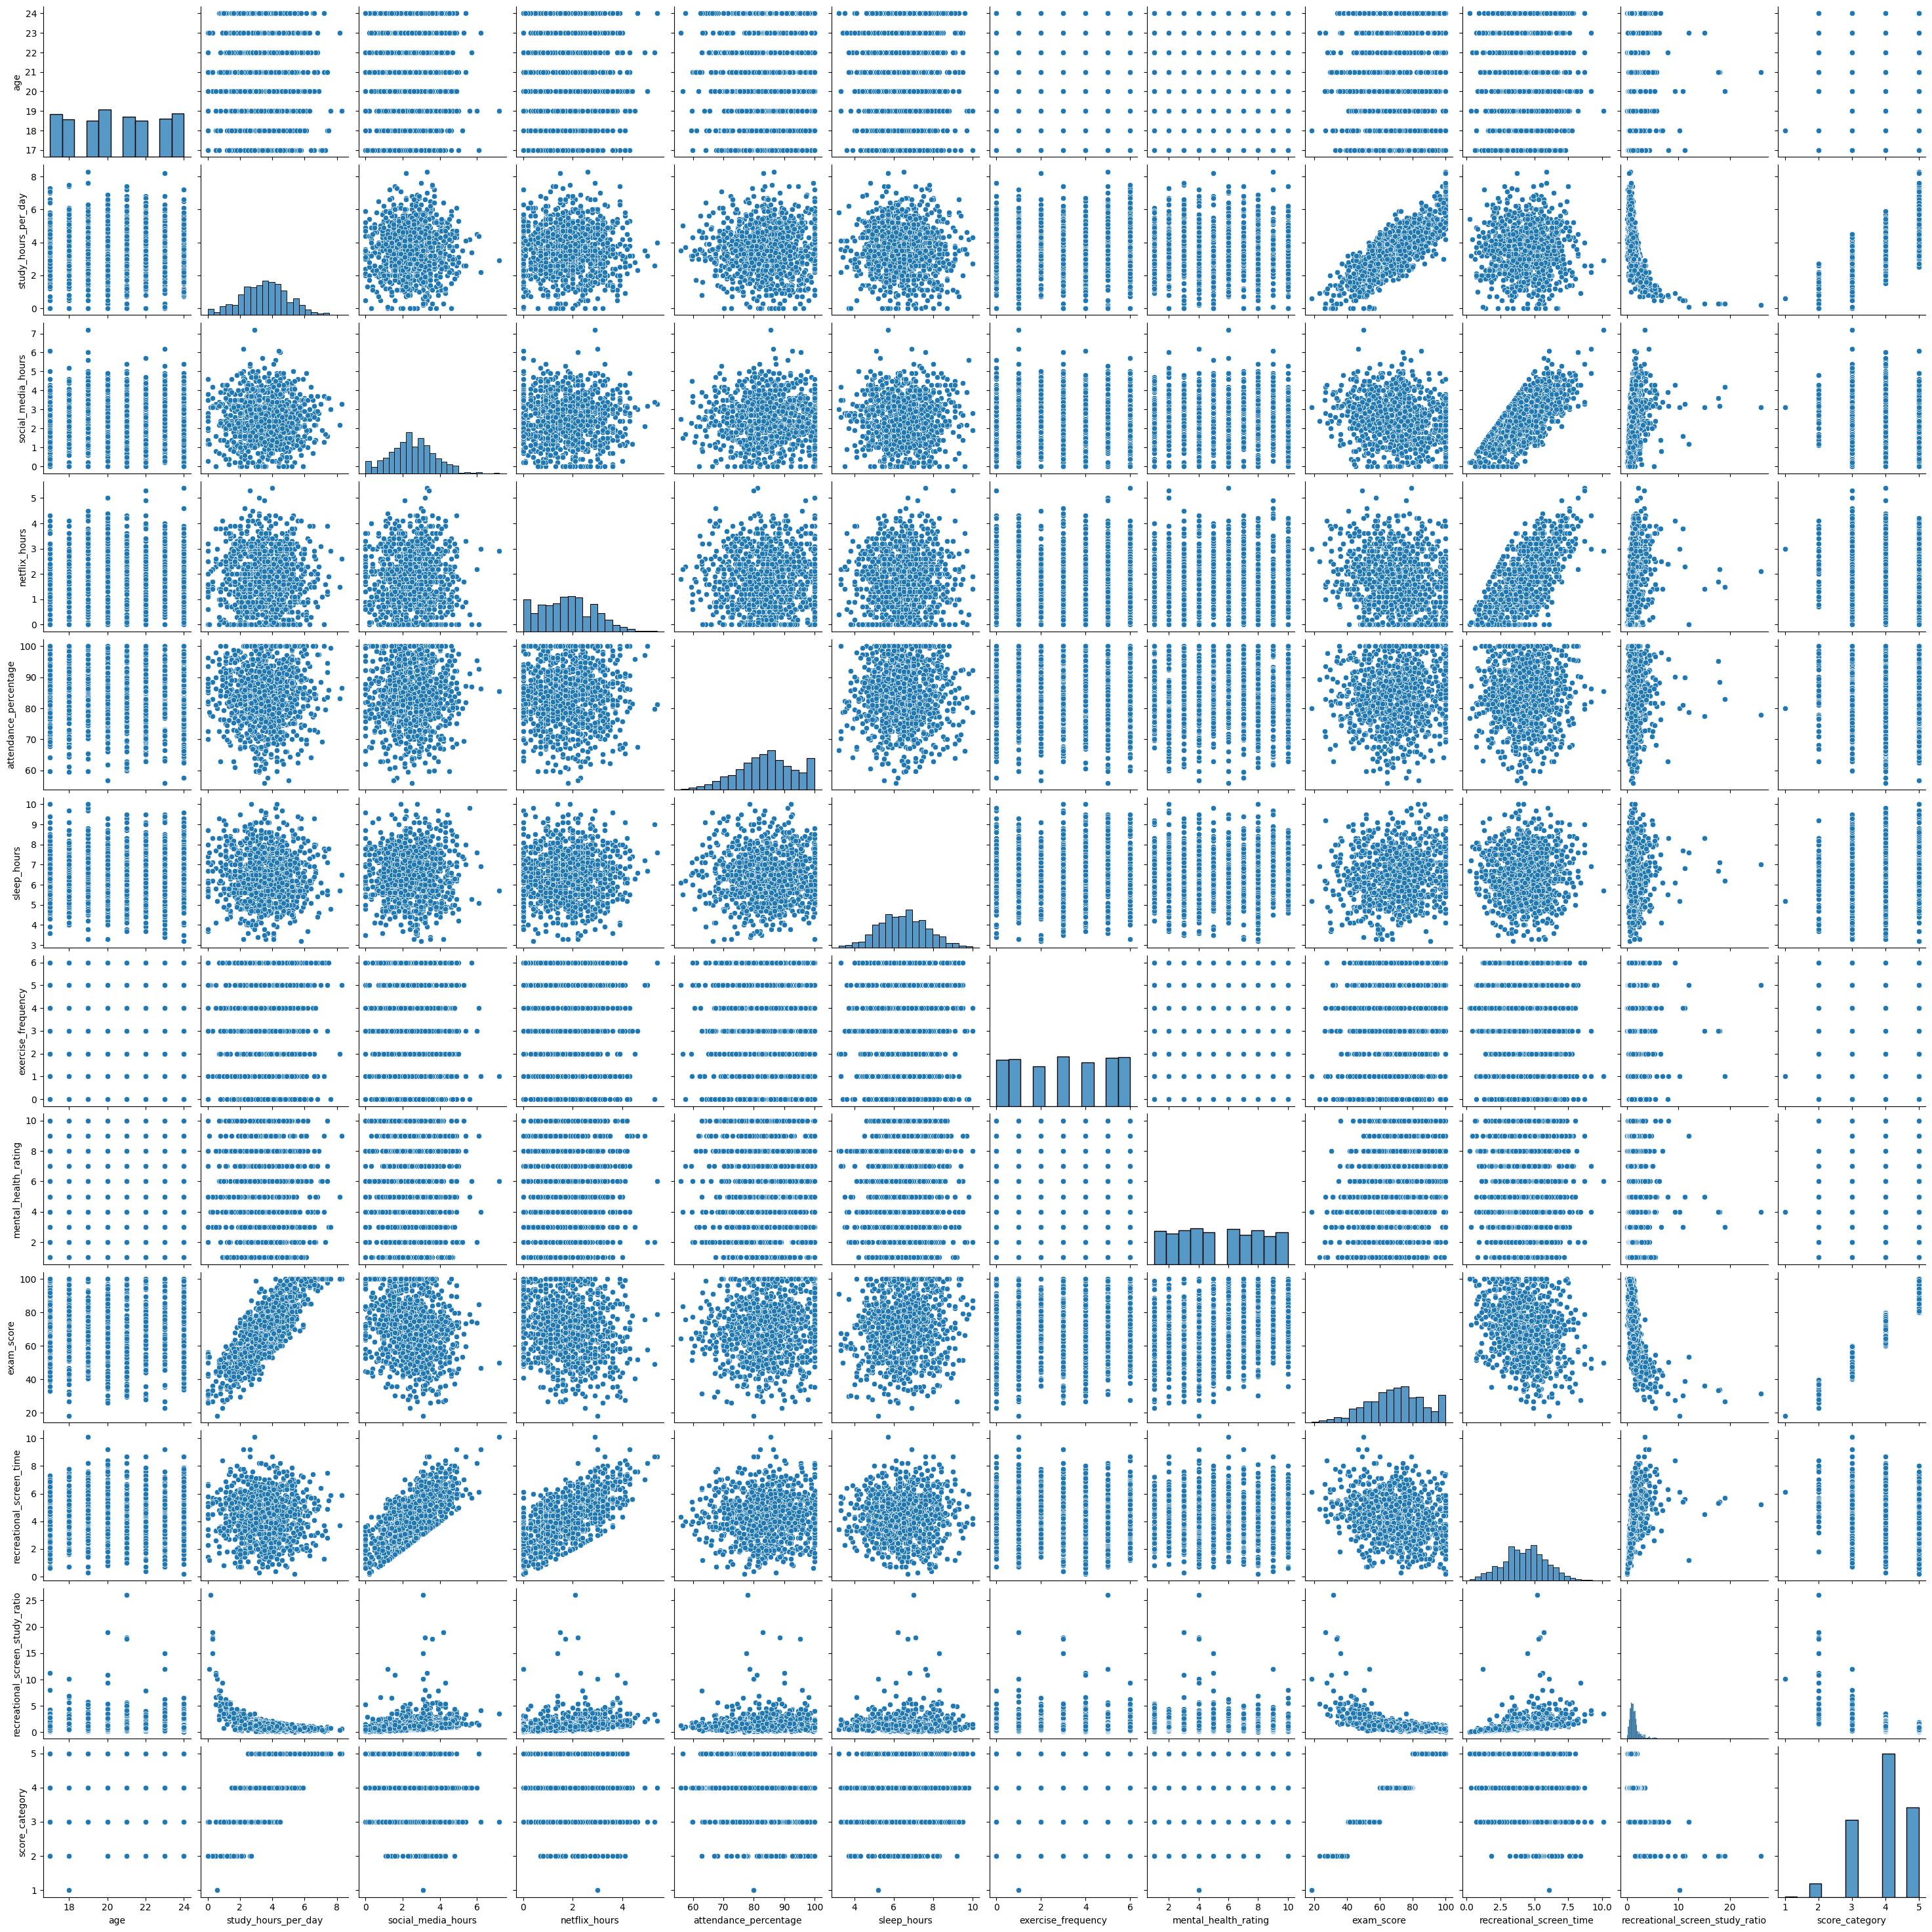

In [ ]:
sns.pairplot(df)
plt.show()

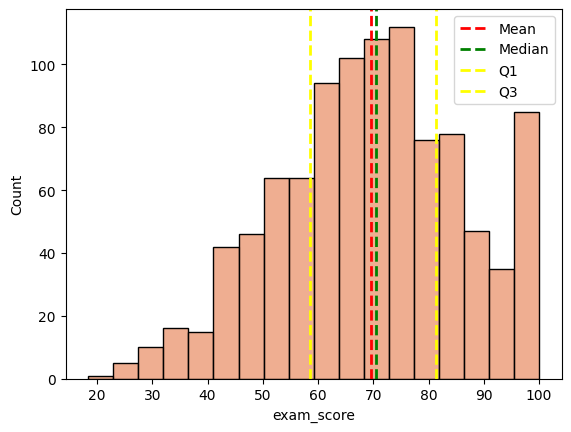

In [ ]:
sns.histplot(data=df, x='exam_score',color='#EA936D')
plt.axvline(
    x=df.exam_score.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label="Mean"
)
plt.axvline(
    x=df.exam_score.median(),
    color='green',
    linestyle='dashed',
    linewidth=2,
    label="Median"
)
plt.axvline(
    x=df.exam_score.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label="Q1"
)
plt.axvline(
    x=df.exam_score.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label="Q3"
)
plt.legend()
plt.show()

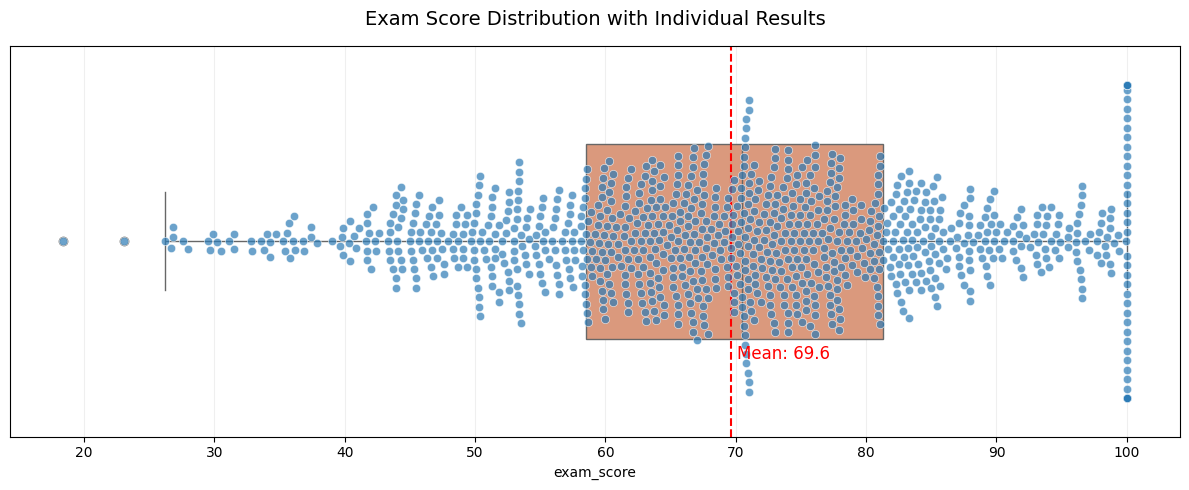

In [ ]:
plt.figure(figsize=(12, 5))


mean_val = df['exam_score'].mean()

# Boxplot
box = sns.boxplot(x=df.exam_score, color='#EA936D', width=0.5)

# Add swarmplot (auto-arranges points)
sns.swarmplot(
    x=df.exam_score,
    color='#2c7bb6',
    alpha=0.7,
    size=6,
    edgecolor='white',  # Better point visibility
    linewidth=0.5
)

# Mean line with annotation
plt.axvline(mean_val, linestyle="dashed", color="red", linewidth=1.5)
plt.text(mean_val+0.5, 0.3, f'Mean: {mean_val.round(2)}',
         color='red', fontsize=12)

# Remove y-axis
plt.yticks([])
plt.ylabel('')

# Professional formatting
plt.grid(axis='x', alpha=0.2)
plt.title('Exam Score Distribution with Individual Results', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

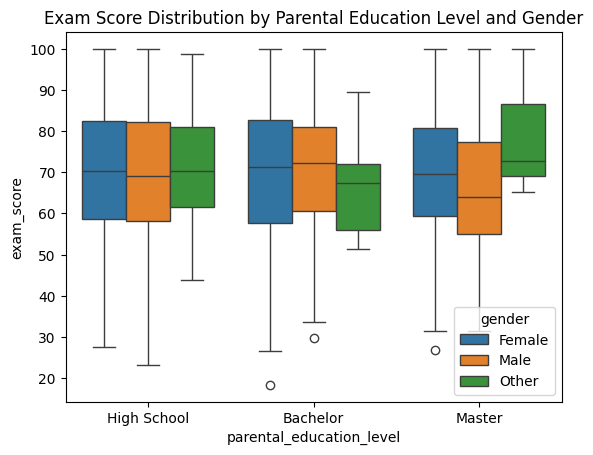

In [ ]:
education_order = ["High School", "Bachelor", "Master"]
sns.boxplot(data=df, x='parental_education_level', y='exam_score',order=education_order,hue='gender')
plt.title('Exam Score Distribution by Parental Education Level and Gender')
plt.show()

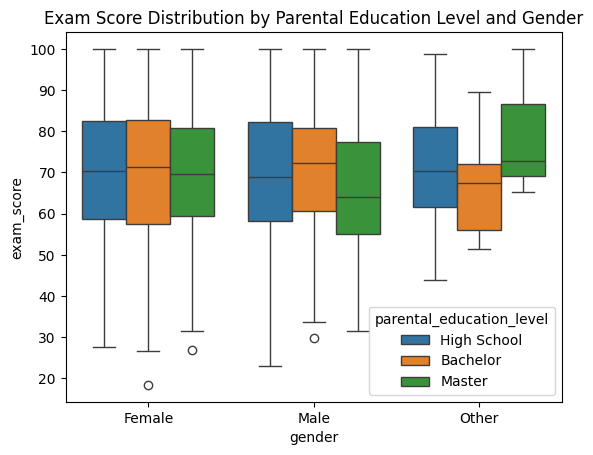

In [ ]:
sns.boxplot(data=df, x='gender', y='exam_score',hue_order=education_order,hue='parental_education_level')
plt.title('Exam Score Distribution by Parental Education Level and Gender')
plt.show()

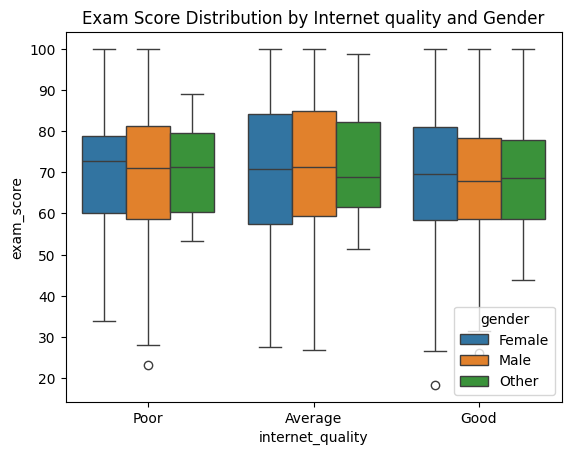

In [ ]:
internet_order = ["Poor", "Average", "Good"]
sns.boxplot(data=df, x='internet_quality', y='exam_score',order=internet_order,hue='gender')
plt.title('Exam Score Distribution by Internet quality and Gender')
plt.show()

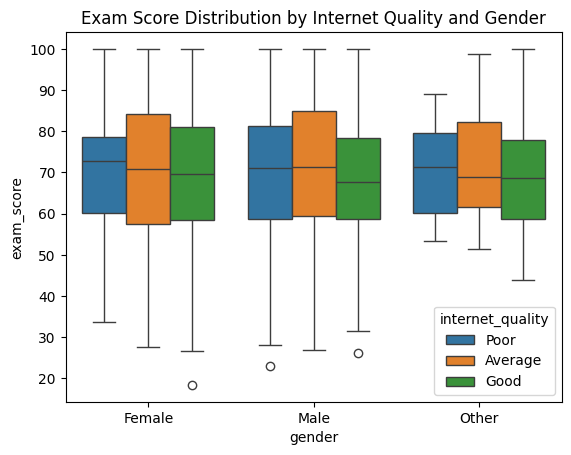

In [ ]:
sns.boxplot(data=df, x='gender', y='exam_score',hue_order=internet_order,hue='internet_quality')
plt.title('Exam Score Distribution by Internet Quality and Gender')
plt.show()

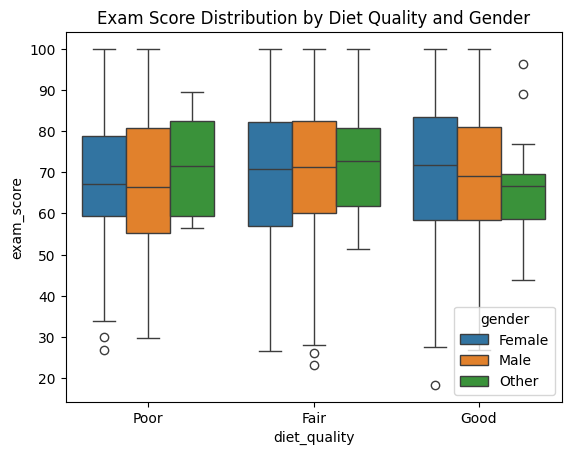

In [ ]:
diet_order=['Poor','Fair','Good']
sns.boxplot(data=df, x='diet_quality', y='exam_score',order=diet_order,hue='gender')
plt.title('Exam Score Distribution by Diet Quality and Gender')
plt.show()

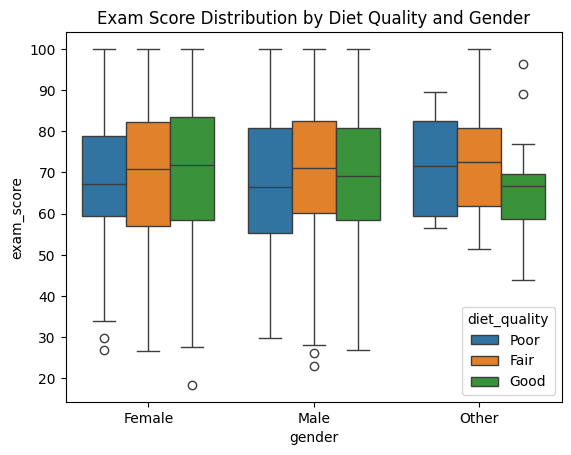

In [ ]:
sns.boxplot(data=df, x='gender', y='exam_score',hue_order=diet_order,hue='diet_quality')
plt.title('Exam Score Distribution by Diet Quality and Gender')
plt.show()

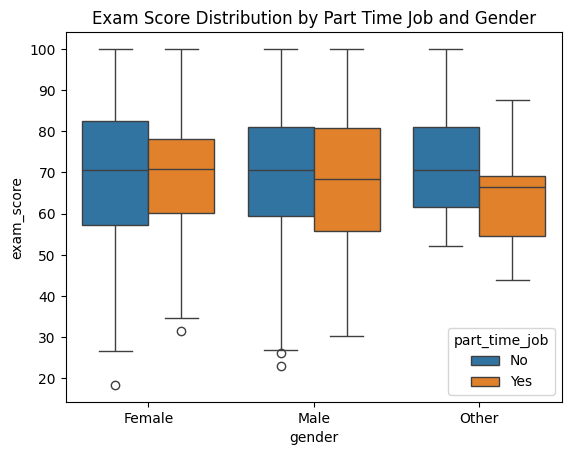

In [ ]:
sns.boxplot(data=df, x='gender', y='exam_score',hue='part_time_job')
plt.title('Exam Score Distribution by Part Time Job and Gender')
plt.show()

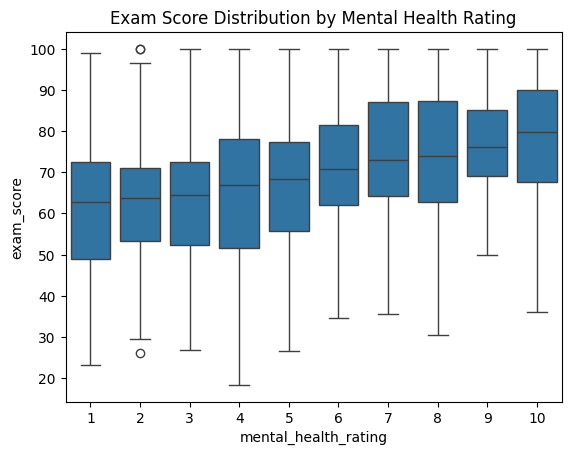

In [ ]:
sns.boxplot(data=df, x='mental_health_rating', y='exam_score')
plt.title('Exam Score Distribution by Mental Health Rating')
plt.show()

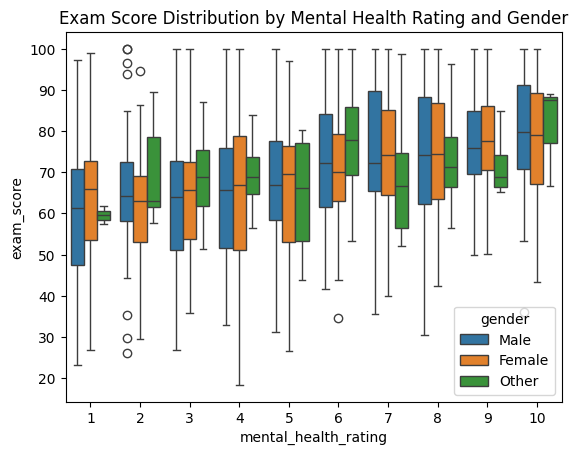

In [ ]:
sns.boxplot(data=df, x='mental_health_rating', y='exam_score',hue='gender')
plt.title('Exam Score Distribution by Mental Health Rating and Gender')
plt.show()

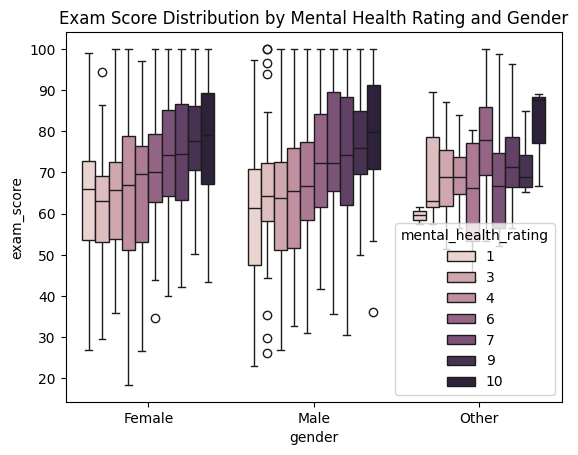

In [ ]:
sns.boxplot(data=df, x='gender', y='exam_score',hue='mental_health_rating')
plt.title('Exam Score Distribution by Mental Health Rating and Gender')
plt.show()

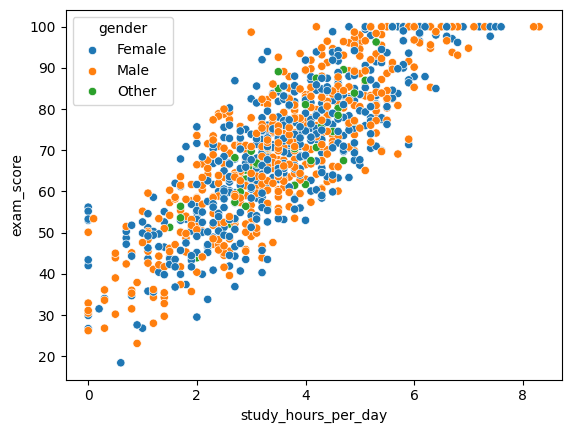

In [ ]:
sns.scatterplot(data=df,x='study_hours_per_day',y='exam_score',hue='gender')
plt.show()

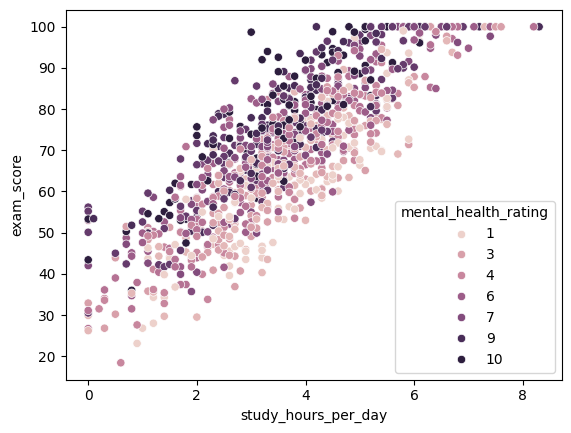

In [ ]:
sns.scatterplot(data=df,x='study_hours_per_day',y='exam_score',hue='mental_health_rating')
plt.show()

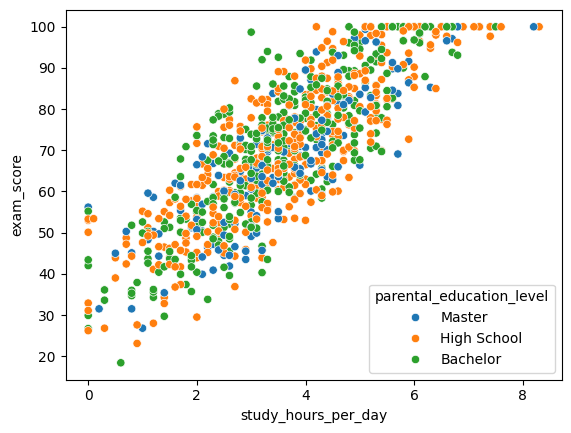

In [ ]:
sns.scatterplot(data=df,x='study_hours_per_day',y='exam_score',hue='parental_education_level')
plt.show()

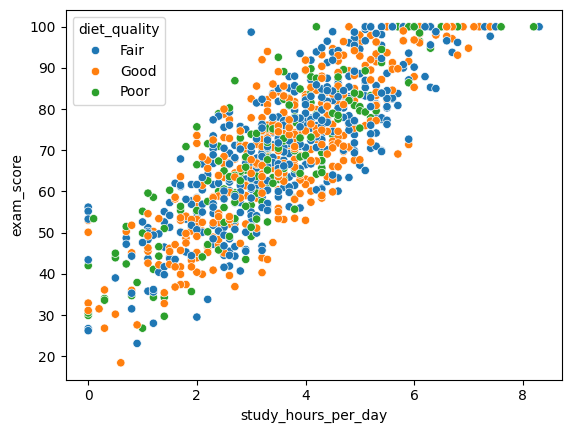

In [ ]:
sns.scatterplot(data=df,x='study_hours_per_day',y='exam_score',hue='diet_quality')
plt.show()

In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def regression(df, varx, vary):

    # Convert to numpy arrays for numerical efficiency
    x = df[varx].values  # Independent variable values
    y = df[vary].values  # Dependent variable values

    # Calculate linear regression parameters
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Generate trend line values
    trend = intercept + slope * x
    deviation = y - trend  # Residuals from trend line

    # Calculate deviation thresholds
    above_mask = deviation > 0  # Positive deviations
    below_mask = deviation < 0  # Negative deviations

    # Handle edge cases with no positive/negative deviations
    upper_deviation = np.quantile(deviation[above_mask], 0.90) if any(above_mask) else 0
    lower_deviation = np.quantile(deviation[below_mask], 0.10) if any(below_mask) else 0

    # Calculate confidence bounds
    upper_trend = trend + upper_deviation  # Upper boundary
    lower_trend = trend + lower_deviation  # Lower boundary

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, color='gray', label='Data Points')
    plt.plot(x, trend, color='red', label='Trend Line')
    plt.plot(x, upper_trend, color='blue', linestyle='--',
             label='Upper Limit (90% Percentile)')
    plt.plot(x, lower_trend, color='green', linestyle='--',
             label='Lower Limit (10% Percentile)')

    plt.title(f'{vary} vs {varx} Relationship with Deviation Bounds', fontsize=16)
    plt.xlabel(varx, fontsize=12)
    plt.ylabel(vary, fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # External legend
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Calculate final equation parameters
    upper_intercept = intercept + abs(lower_deviation)
    lower_intercept = intercept - abs(lower_deviation)

    # Print formatted equations
    print(f"Trend Line Equation: {vary} = {intercept:.4f} + {slope:.4f} * {varx}")
    print(f"Upper Limit Equation: {vary} = {upper_intercept:.4f} + {slope:.4f} * {varx}")
    print(f"Lower Limit Equation: {vary} = {lower_intercept:.4f} + {slope:.4f} * {varx}")

    return slope, intercept, upper_intercept, lower_intercept


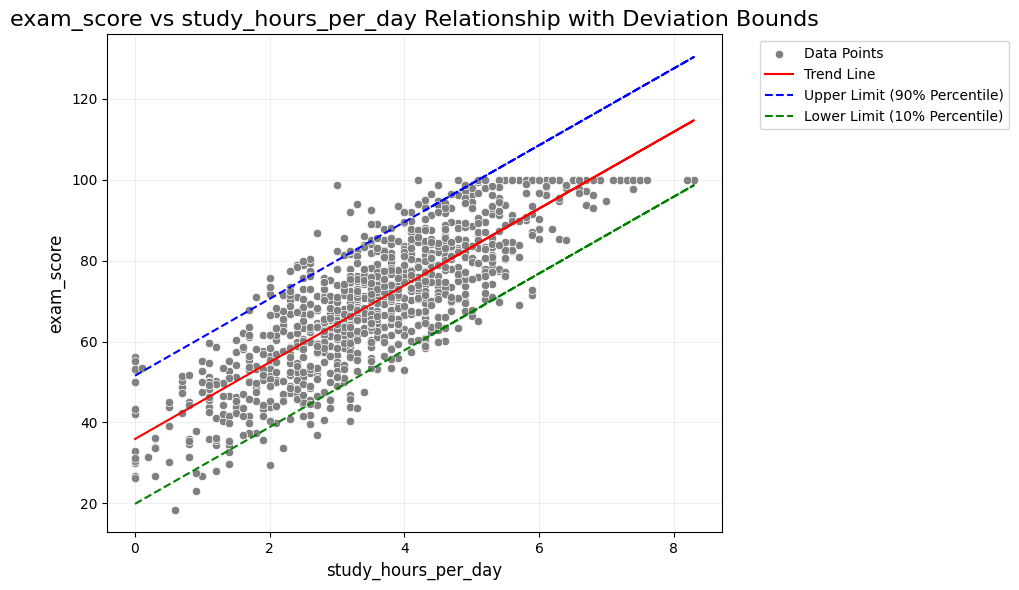

Trend Line Equation: exam_score = 35.9102 + 9.4903 * study_hours_per_day
Upper Limit Equation: exam_score = 51.9514 + 9.4903 * study_hours_per_day
Lower Limit Equation: exam_score = 19.8689 + 9.4903 * study_hours_per_day


(np.float64(9.490250405896829),
 np.float64(35.91016203402567),
 np.float64(51.95143756249857),
 np.float64(19.868886505552766))

In [ ]:
regression(df,'study_hours_per_day','exam_score')

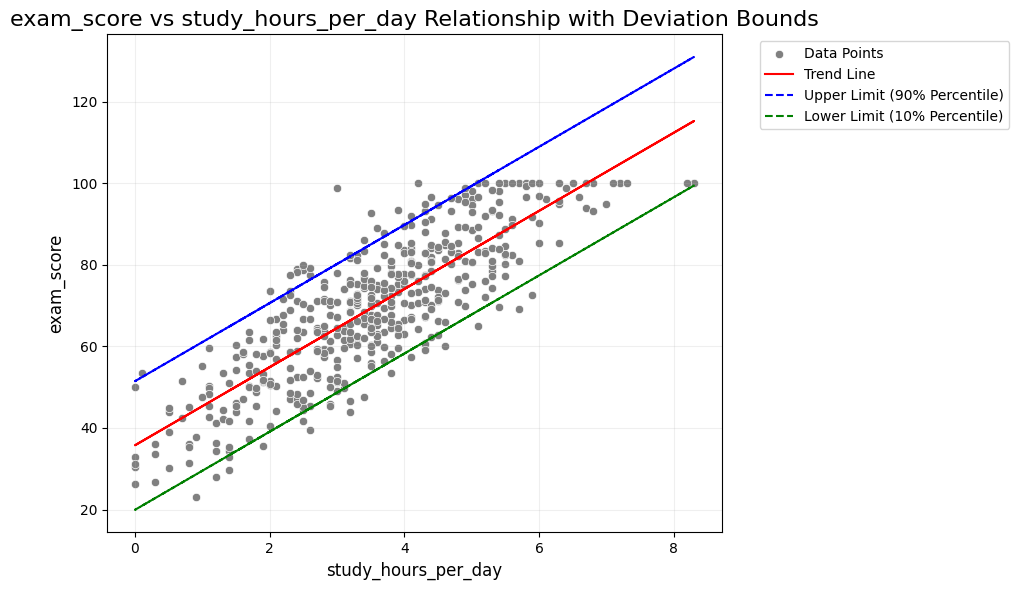

Trend Line Equation: exam_score = 35.7555 + 9.5744 * study_hours_per_day
Upper Limit Equation: exam_score = 51.5747 + 9.5744 * study_hours_per_day
Lower Limit Equation: exam_score = 19.9364 + 9.5744 * study_hours_per_day


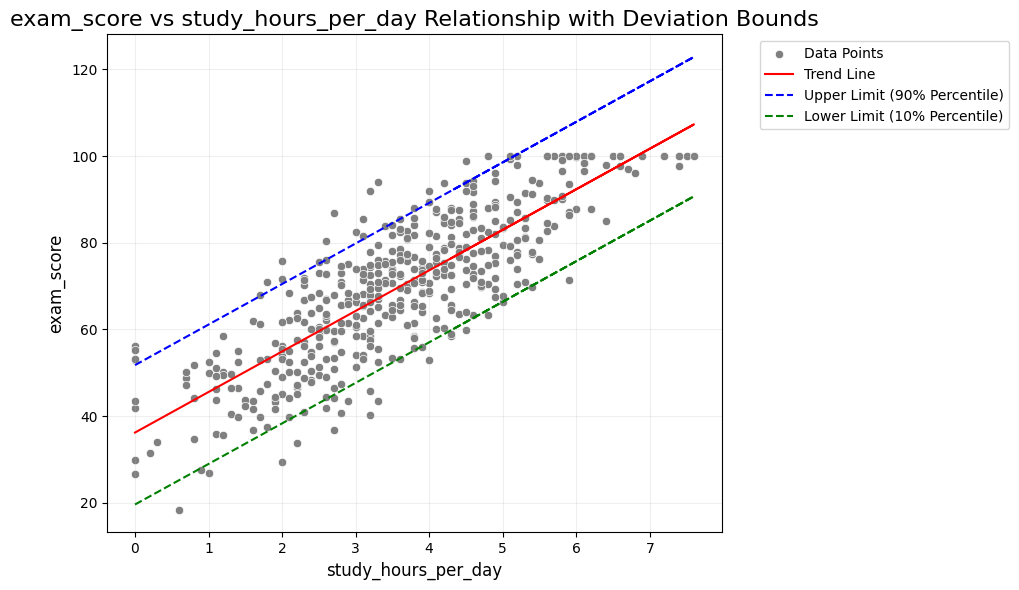

Trend Line Equation: exam_score = 36.2232 + 9.3527 * study_hours_per_day
Upper Limit Equation: exam_score = 52.8207 + 9.3527 * study_hours_per_day
Lower Limit Equation: exam_score = 19.6258 + 9.3527 * study_hours_per_day


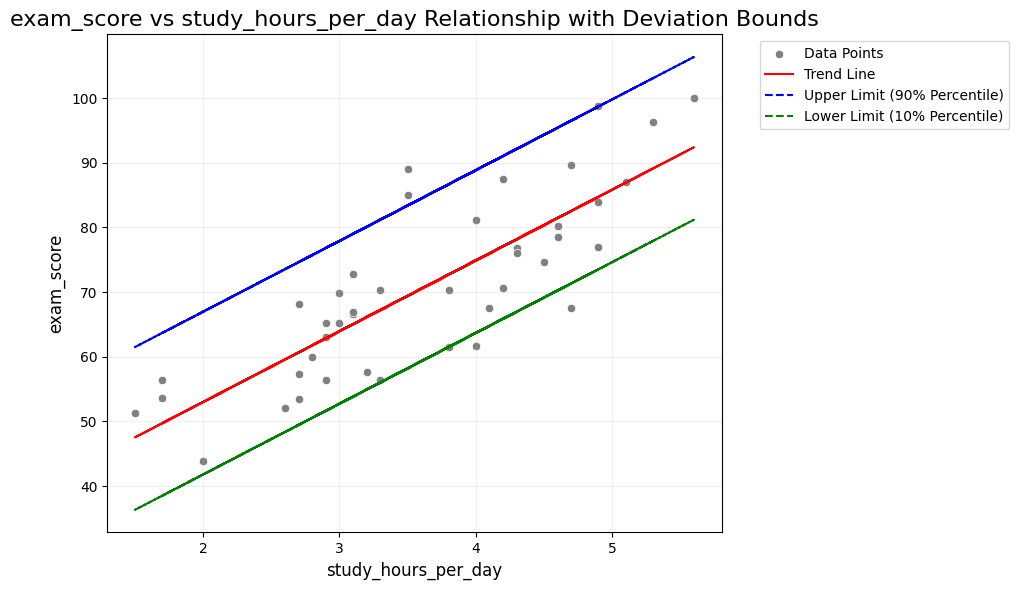

Trend Line Equation: exam_score = 31.1374 + 10.9389 * study_hours_per_day
Upper Limit Equation: exam_score = 42.3425 + 10.9389 * study_hours_per_day
Lower Limit Equation: exam_score = 19.9322 + 10.9389 * study_hours_per_day


In [ ]:
slopem,interceptm,upperm,lowerm=regression(df[df['gender']=='Male'],'study_hours_per_day','exam_score')
slopef,interceptf,upperf,lowerf=regression(df[df['gender']=='Female'],'study_hours_per_day','exam_score')
slopeo,intercepto,uppero,lowero=regression(df[df['gender']=='Other'],'study_hours_per_day','exam_score')

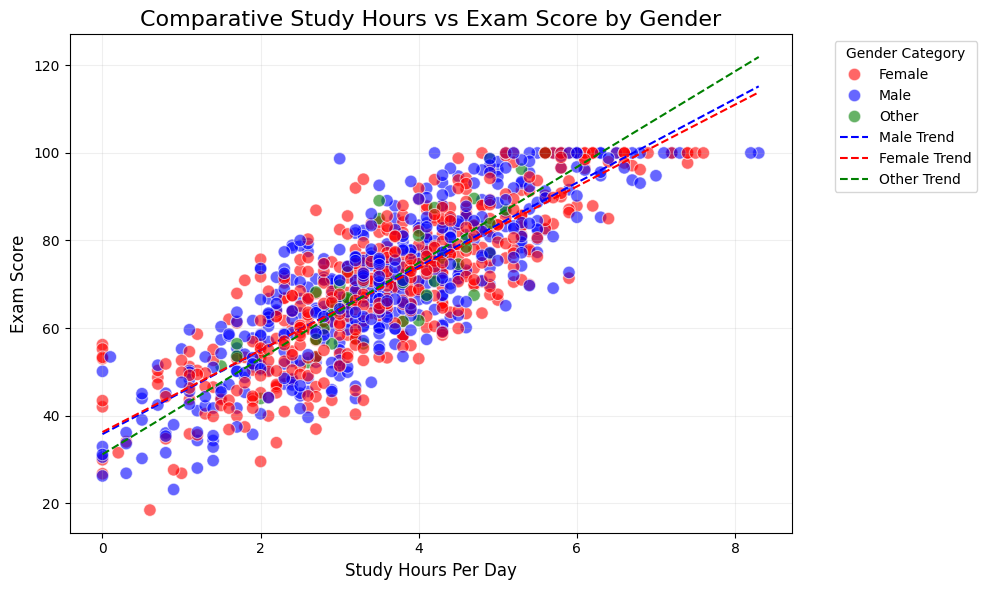

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender',
                palette={'Male':'blue', 'Female':'red', 'Other':'green'},
                alpha=0.6, s=80)

# Generar datos para las líneas de tendencia
x_range = np.linspace(df['study_hours_per_day'].min(), df['study_hours_per_day'].max(), 100)

# Graficar cada línea de tendencia
plt.plot(x_range, slopem * x_range + interceptm, '--', color='blue', label='Male Trend')
plt.plot(x_range, interceptf + slopef * x_range, '--', color='red', label='Female Trend')  # Corregí slopem -> slopef
plt.plot(x_range, intercepto + slopeo * x_range, '--', color='green', label='Other Trend')

# Personalización del gráfico
plt.title('Comparative Study Hours vs Exam Score by Gender', fontsize=16)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Gender Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

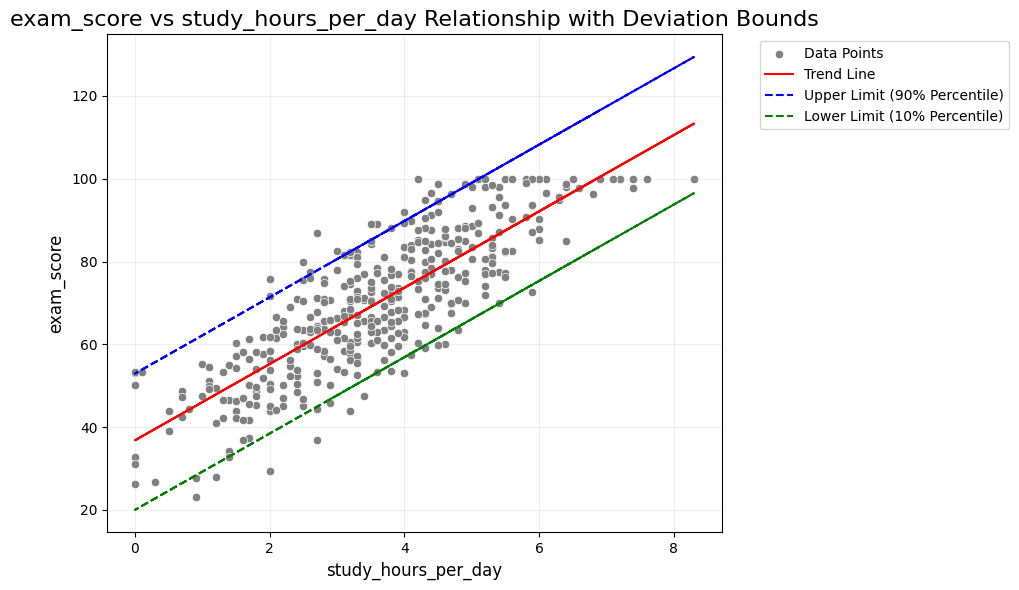

Trend Line Equation: exam_score = 36.8254 + 9.2141 * study_hours_per_day
Upper Limit Equation: exam_score = 53.6216 + 9.2141 * study_hours_per_day
Lower Limit Equation: exam_score = 20.0293 + 9.2141 * study_hours_per_day


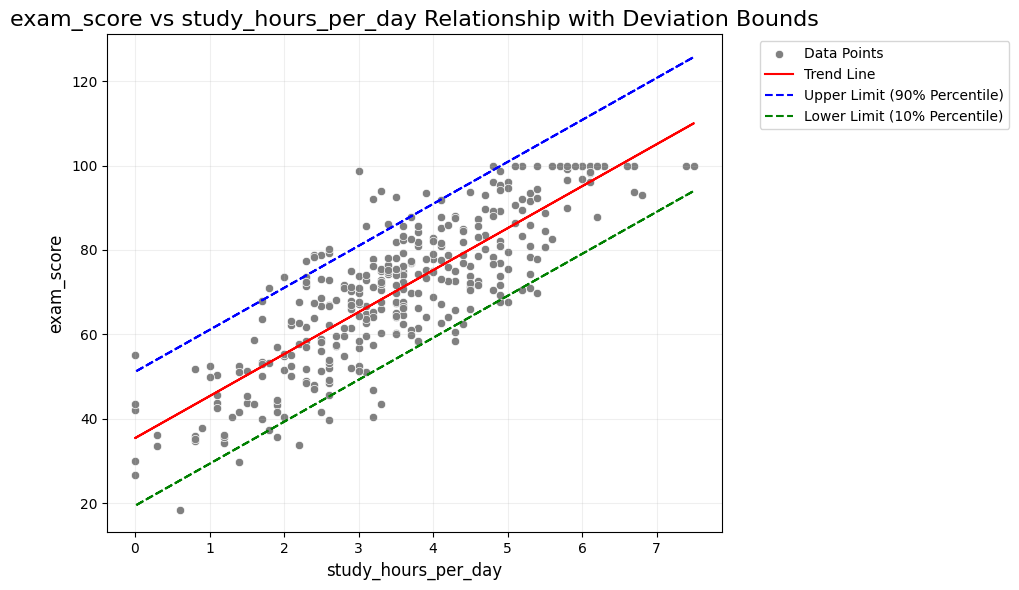

Trend Line Equation: exam_score = 35.3902 + 9.9518 * study_hours_per_day
Upper Limit Equation: exam_score = 51.4237 + 9.9518 * study_hours_per_day
Lower Limit Equation: exam_score = 19.3567 + 9.9518 * study_hours_per_day


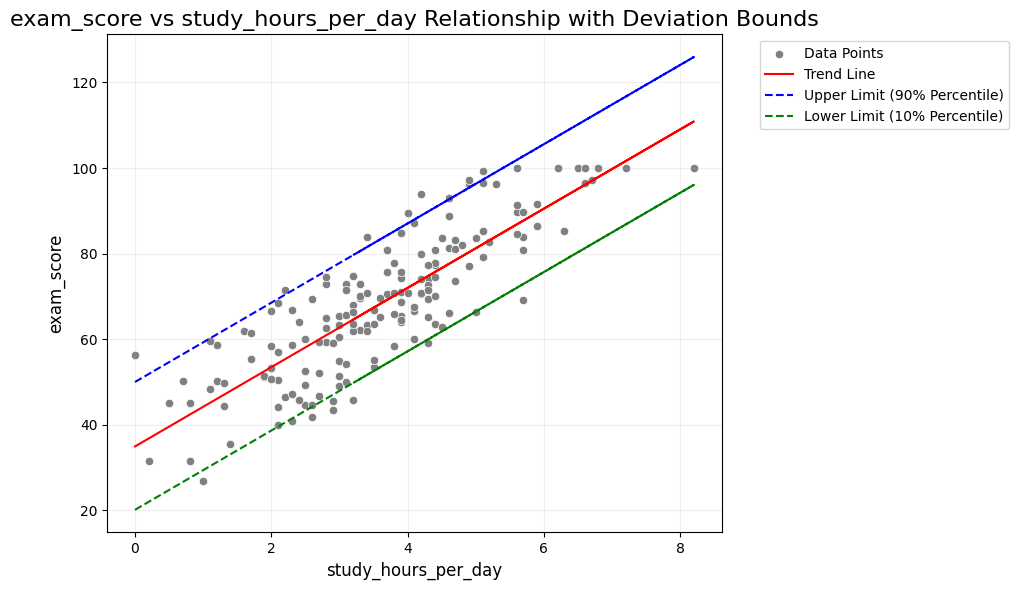

Trend Line Equation: exam_score = 34.9237 + 9.2644 * study_hours_per_day
Upper Limit Equation: exam_score = 49.7358 + 9.2644 * study_hours_per_day
Lower Limit Equation: exam_score = 20.1116 + 9.2644 * study_hours_per_day


In [ ]:
slopehighschool,intercepthighschool,upperhighschool,lowerhighschool=regression(df[df['parental_education_level']=='High School'],'study_hours_per_day','exam_score')
slopebachelor,interceptbachelor,upperbachelor,lowerbachelor=regression(df[df['parental_education_level']=='Bachelor'],'study_hours_per_day','exam_score')
slopemaster,interceptmaster,uppermaster,lowermaster=regression(df[df['parental_education_level']=='Master'],'study_hours_per_day','exam_score')

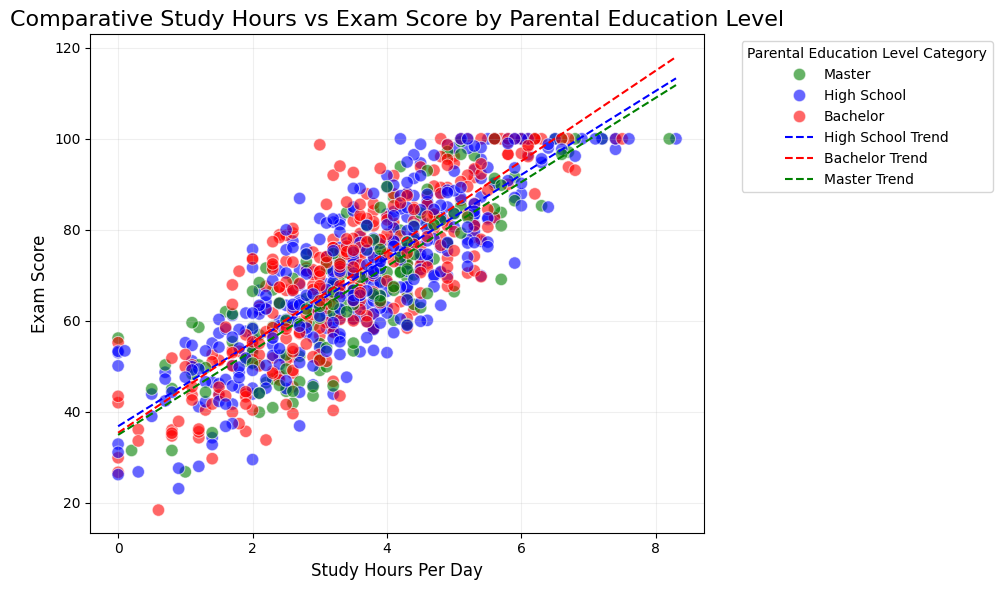

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='parental_education_level',
                palette={'High School':'blue', 'Bachelor':'red', 'Master':'green'},
                alpha=0.6, s=80)

# Generar datos para las líneas de tendencia
x_range = np.linspace(df['study_hours_per_day'].min(), df['study_hours_per_day'].max(), 100)

# Graficar cada línea de tendencia
plt.plot(x_range, slopehighschool * x_range + intercepthighschool, '--', color='blue', label='High School Trend')
plt.plot(x_range, interceptbachelor + slopebachelor * x_range, '--', color='red', label='Bachelor Trend')  # Corregí slopem -> slopef
plt.plot(x_range, interceptmaster + slopemaster * x_range, '--', color='green', label='Master Trend')

# Personalización del gráfico
plt.title('Comparative Study Hours vs Exam Score by Parental Education Level', fontsize=16)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Parental Education Level Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

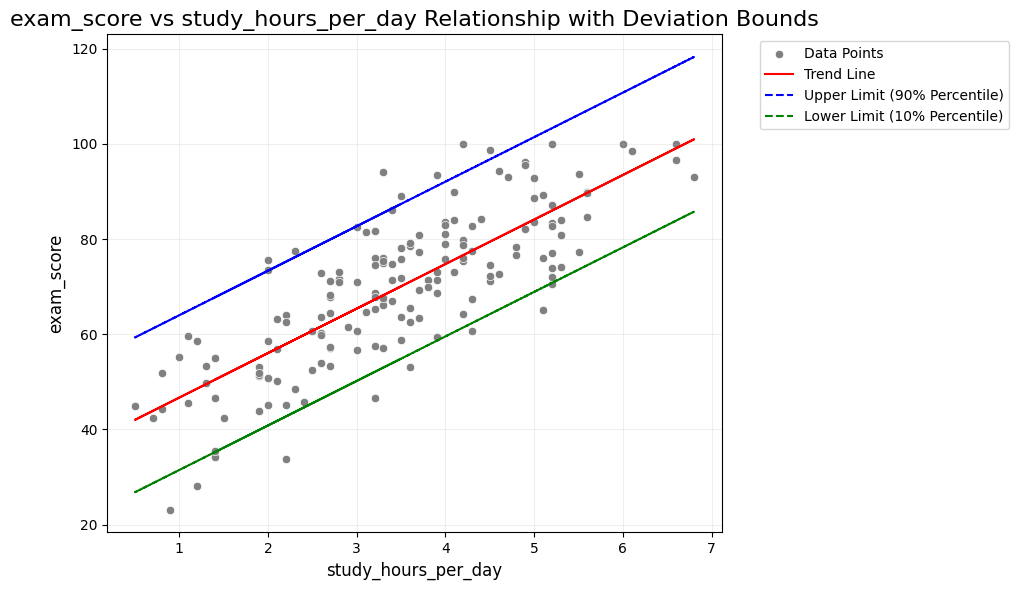

Trend Line Equation: exam_score = 37.3297 + 9.3559 * study_hours_per_day
Upper Limit Equation: exam_score = 52.5386 + 9.3559 * study_hours_per_day
Lower Limit Equation: exam_score = 22.1208 + 9.3559 * study_hours_per_day


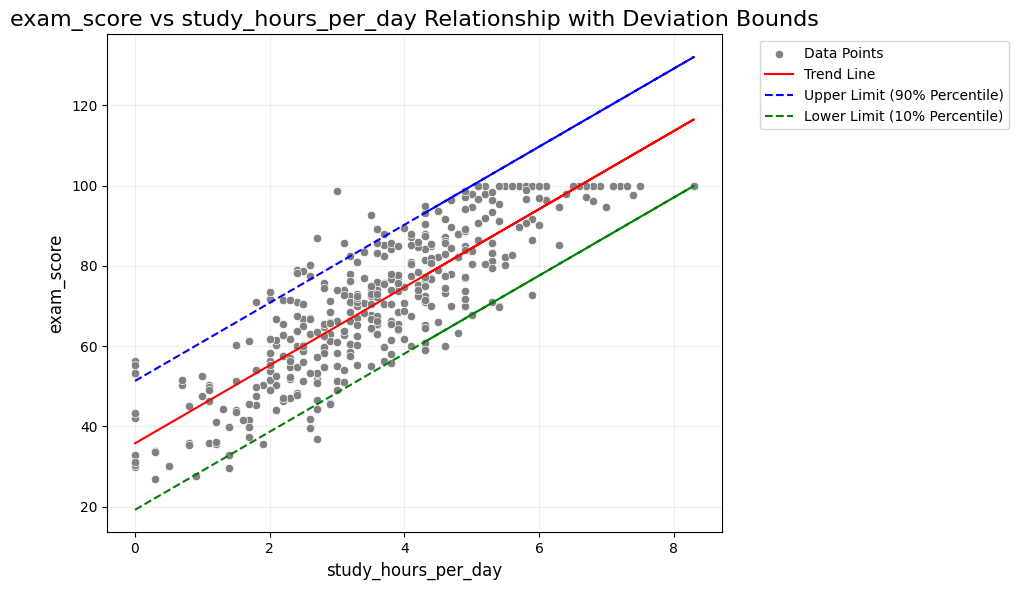

Trend Line Equation: exam_score = 35.7922 + 9.7246 * study_hours_per_day
Upper Limit Equation: exam_score = 52.3486 + 9.7246 * study_hours_per_day
Lower Limit Equation: exam_score = 19.2358 + 9.7246 * study_hours_per_day


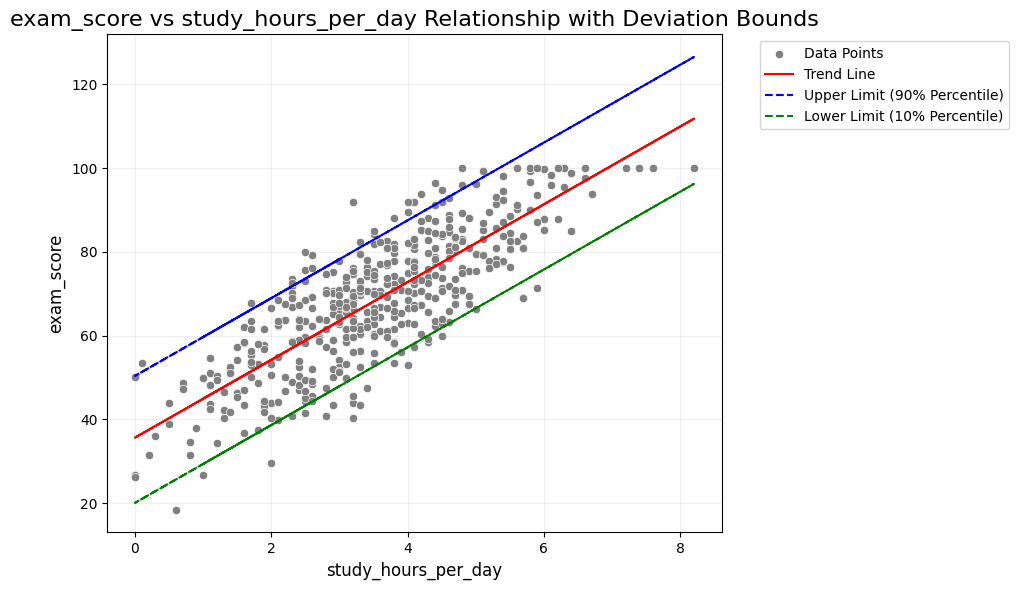

Trend Line Equation: exam_score = 35.6433 + 9.2903 * study_hours_per_day
Upper Limit Equation: exam_score = 51.2189 + 9.2903 * study_hours_per_day
Lower Limit Equation: exam_score = 20.0676 + 9.2903 * study_hours_per_day


In [ ]:
slopeinternetpoor,interceptinternetpoor,upperinternetpoor,lowerinternetpoor=regression(df[df['internet_quality']=='Poor'],'study_hours_per_day','exam_score')
slopeinternetaverage,interceptinternetaverage,upperinternetaverage,lowerinternetaverage=regression(df[df['internet_quality']=='Average'],'study_hours_per_day','exam_score')
slopeinternetgood,interceptinternetgood,upperinternetgood,lowerinternetgood=regression(df[df['internet_quality']=='Good'],'study_hours_per_day','exam_score')

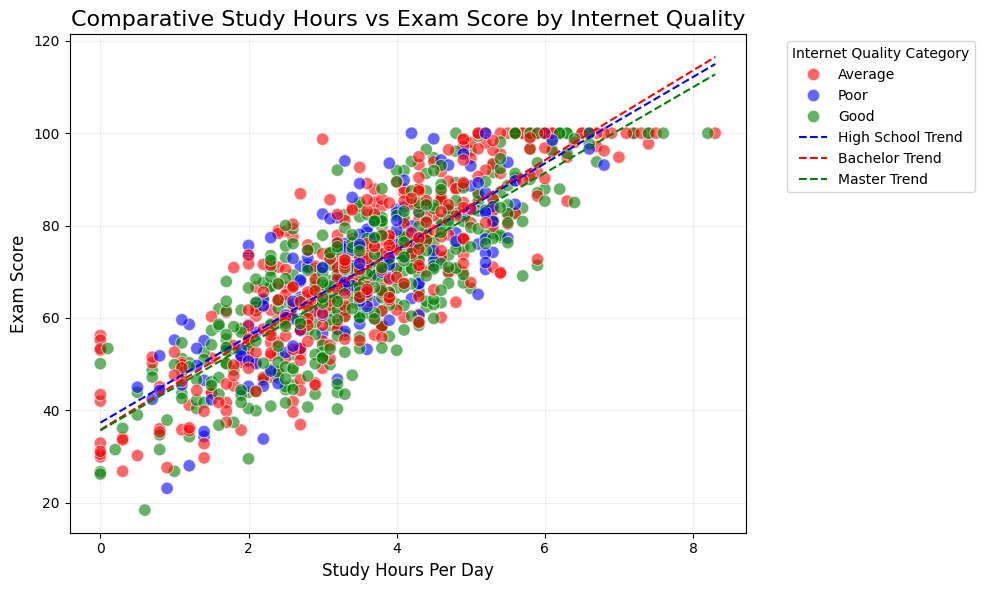

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='internet_quality',
                palette={'Poor':'blue', 'Average':'red', 'Good':'green'},
                alpha=0.6, s=80)

# Generar datos para las líneas de tendencia
x_range = np.linspace(df['study_hours_per_day'].min(), df['study_hours_per_day'].max(), 100)

# Graficar cada línea de tendencia
plt.plot(x_range, slopeinternetpoor * x_range + interceptinternetpoor, '--', color='blue', label='High School Trend')
plt.plot(x_range, interceptinternetaverage + slopeinternetaverage * x_range, '--', color='red', label='Bachelor Trend')  # Corregí slopem -> slopef
plt.plot(x_range, interceptinternetgood + slopeinternetgood * x_range, '--', color='green', label='Master Trend')

# Personalización del gráfico
plt.title('Comparative Study Hours vs Exam Score by Internet Quality', fontsize=16)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Internet Quality Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

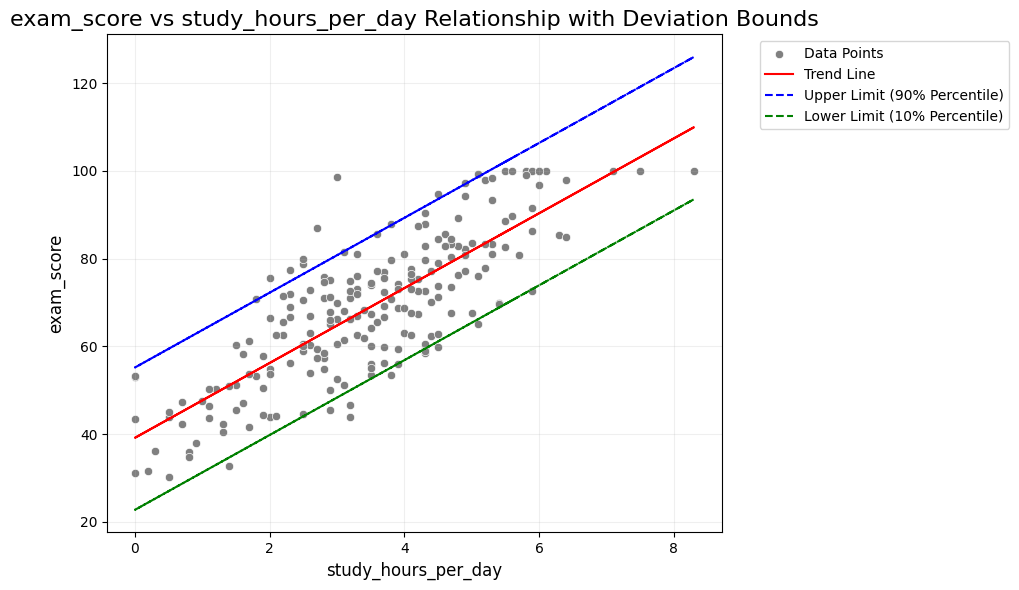

Trend Line Equation: exam_score = 39.1468 + 8.5332 * study_hours_per_day
Upper Limit Equation: exam_score = 55.5772 + 8.5332 * study_hours_per_day
Lower Limit Equation: exam_score = 22.7164 + 8.5332 * study_hours_per_day


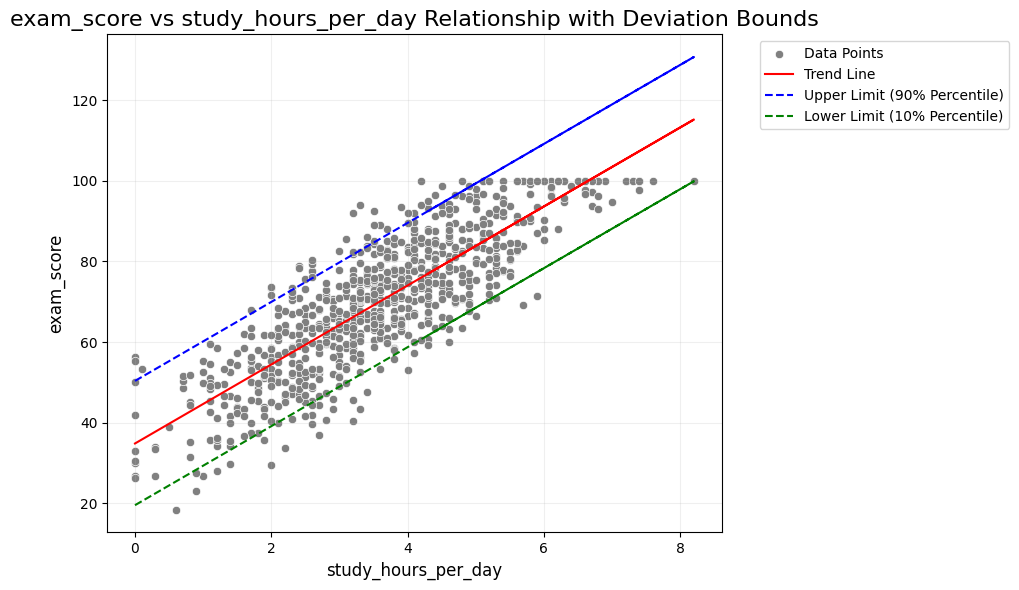

Trend Line Equation: exam_score = 34.8461 + 9.7944 * study_hours_per_day
Upper Limit Equation: exam_score = 50.1455 + 9.7944 * study_hours_per_day
Lower Limit Equation: exam_score = 19.5468 + 9.7944 * study_hours_per_day


In [ ]:
slopeparttimeyes,interceptparttimeyes,upperparttimeyes,lowerparttimeyes=regression(df[df['part_time_job']=='Yes'],'study_hours_per_day','exam_score')
slopeparttimeno,interceptparttimeno,upperparttimeno,lowerparttimeno=regression(df[df['part_time_job']=='No'],'study_hours_per_day','exam_score')

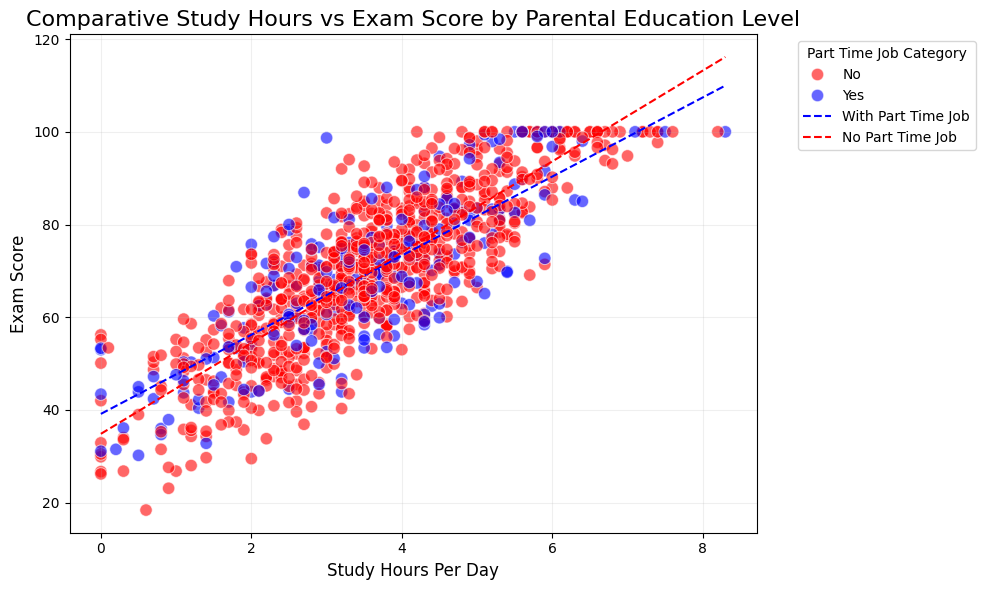

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='part_time_job',
                palette={'Yes':'blue', 'No':'red'},
                alpha=0.6, s=80)

# Generar datos para las líneas de tendencia
x_range = np.linspace(df['study_hours_per_day'].min(), df['study_hours_per_day'].max(), 100)

# Graficar cada línea de tendencia
plt.plot(x_range, slopeparttimeyes * x_range + interceptparttimeyes, '--', color='blue', label='With Part Time Job')
plt.plot(x_range, interceptparttimeno + slopeparttimeno * x_range, '--', color='red', label='No Part Time Job')  # Corregí slopem -> slopef

# Personalización del gráfico
plt.title('Comparative Study Hours vs Exam Score by Parental Education Level', fontsize=16)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Part Time Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

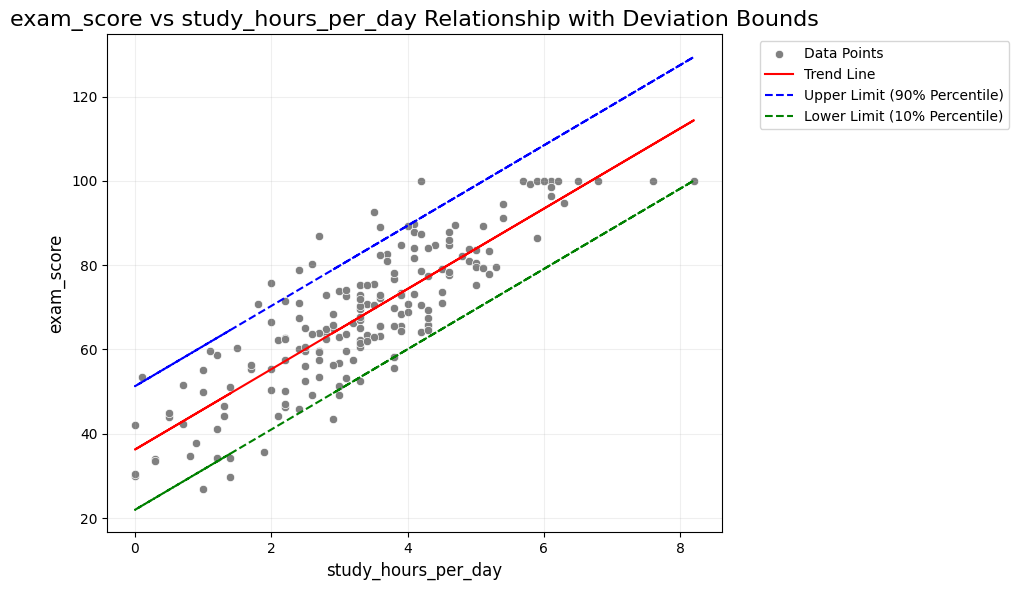

Trend Line Equation: exam_score = 36.2586 + 9.5293 * study_hours_per_day
Upper Limit Equation: exam_score = 50.5685 + 9.5293 * study_hours_per_day
Lower Limit Equation: exam_score = 21.9488 + 9.5293 * study_hours_per_day


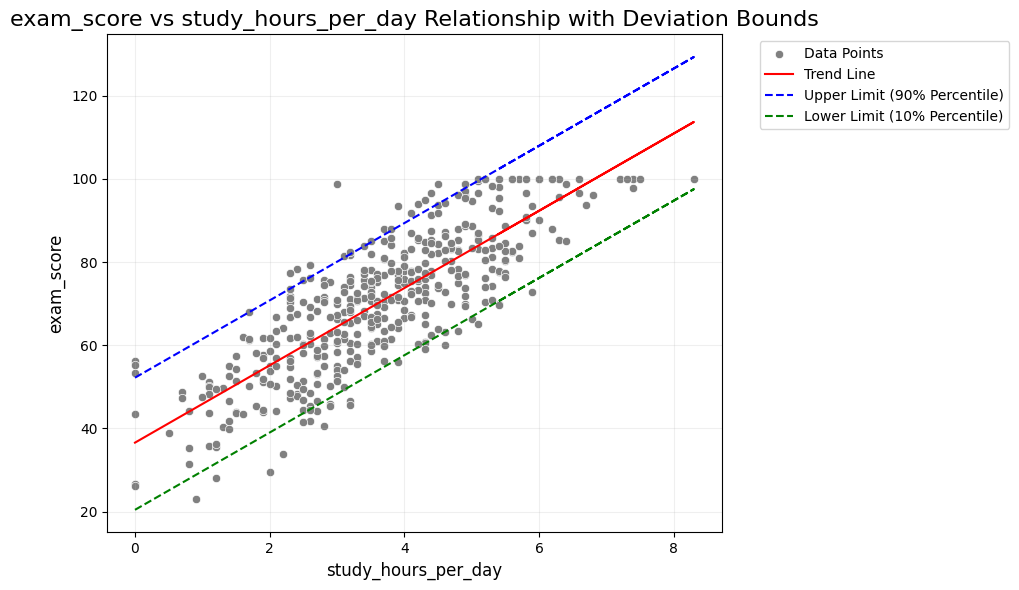

Trend Line Equation: exam_score = 36.5856 + 9.2899 * study_hours_per_day
Upper Limit Equation: exam_score = 52.7368 + 9.2899 * study_hours_per_day
Lower Limit Equation: exam_score = 20.4344 + 9.2899 * study_hours_per_day


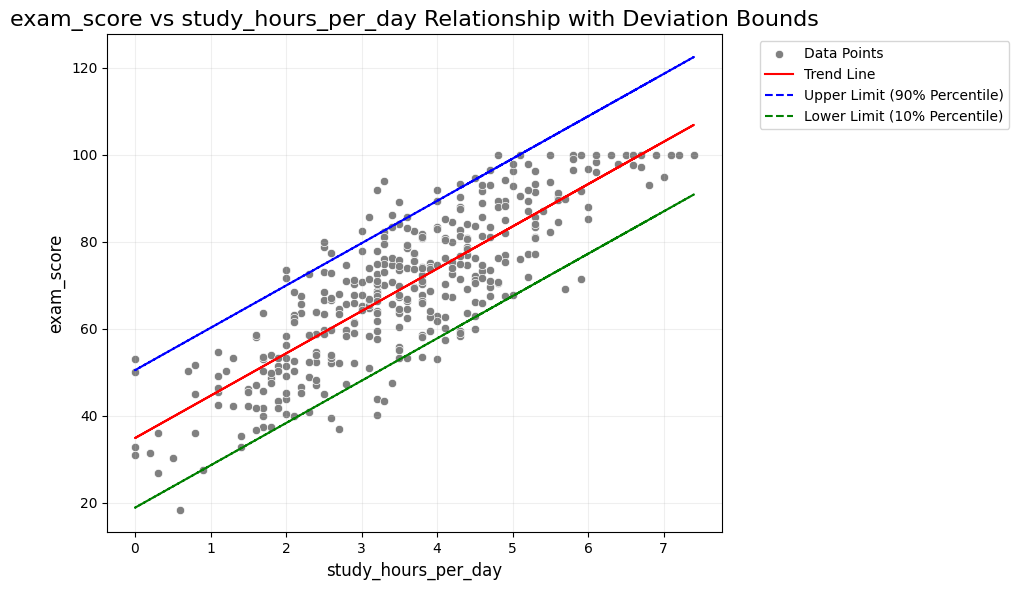

Trend Line Equation: exam_score = 34.8888 + 9.7301 * study_hours_per_day
Upper Limit Equation: exam_score = 50.8934 + 9.7301 * study_hours_per_day
Lower Limit Equation: exam_score = 18.8842 + 9.7301 * study_hours_per_day


In [ ]:
slopedietpoor,interceptdietpoor,upperdietpoor,lowerdietpoor=regression(df[df['diet_quality']=='Poor'],'study_hours_per_day','exam_score')
slopedietfair,interceptdietfair,upperdietfair,lowerdietfair=regression(df[df['diet_quality']=='Fair'],'study_hours_per_day','exam_score')
slopedietgood,interceptdietgood,upperdietgood,lowerdietgood=regression(df[df['diet_quality']=='Good'],'study_hours_per_day','exam_score')

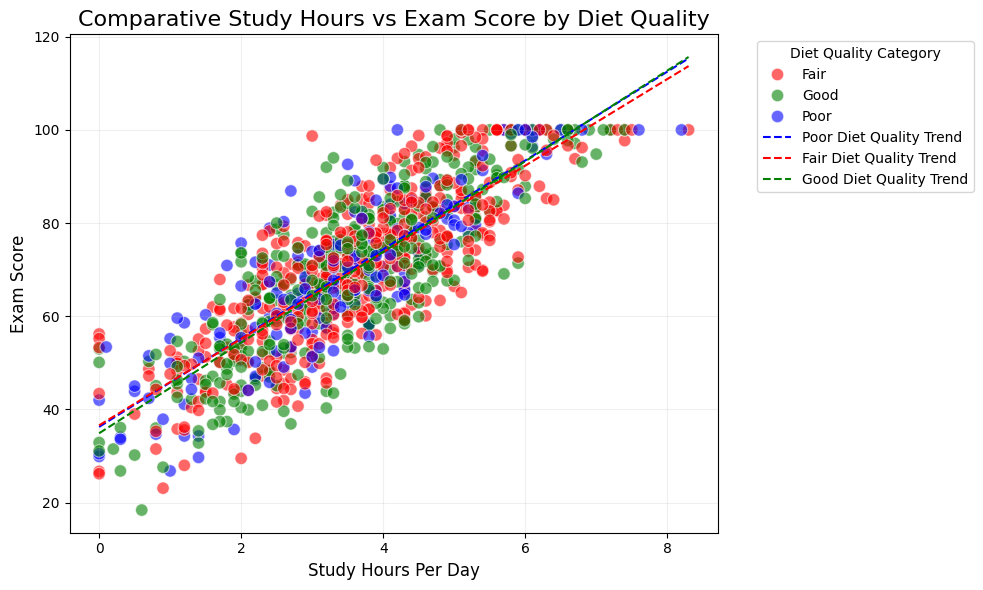

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='diet_quality',
                palette={'Poor':'blue', 'Fair':'red', 'Good':'green'},
                alpha=0.6, s=80)

# Generar datos para las líneas de tendencia
x_range = np.linspace(df['study_hours_per_day'].min(), df['study_hours_per_day'].max(), 100)

# Graficar cada línea de tendencia
plt.plot(x_range, slopedietpoor * x_range + interceptdietpoor, '--', color='blue', label='Poor Diet Quality Trend')
plt.plot(x_range, interceptdietfair + slopedietfair * x_range, '--', color='red', label='Fair Diet Quality Trend')  # Corregí slopem -> slopef
plt.plot(x_range, interceptdietgood + slopedietgood * x_range, '--', color='green', label='Good Diet Quality Trend')

# Personalización del gráfico
plt.title('Comparative Study Hours vs Exam Score by Diet Quality', fontsize=16)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Diet Quality Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

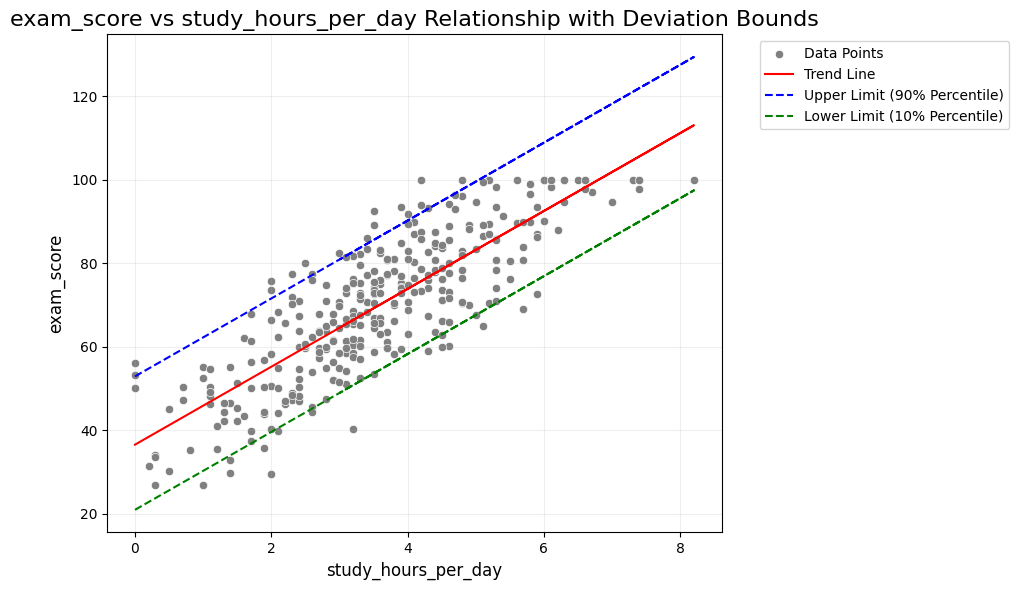

Trend Line Equation: exam_score = 36.5572 + 9.3326 * study_hours_per_day
Upper Limit Equation: exam_score = 52.1709 + 9.3326 * study_hours_per_day
Lower Limit Equation: exam_score = 20.9436 + 9.3326 * study_hours_per_day


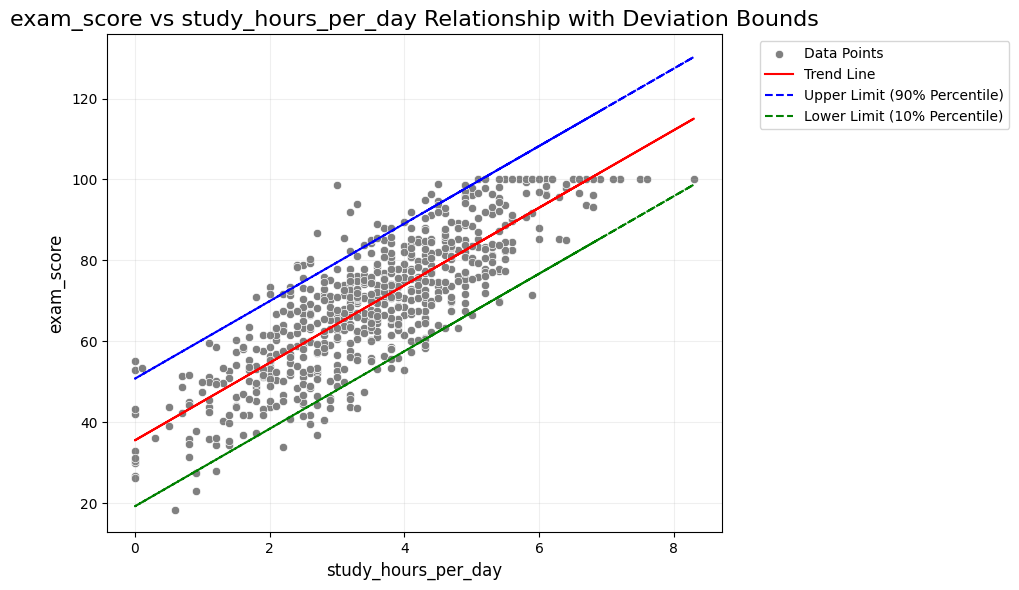

Trend Line Equation: exam_score = 35.5761 + 9.5727 * study_hours_per_day
Upper Limit Equation: exam_score = 51.8748 + 9.5727 * study_hours_per_day
Lower Limit Equation: exam_score = 19.2773 + 9.5727 * study_hours_per_day


In [ ]:
slopeextrayes,interceptextrayes,upperextrayes,lowerextrayes=regression(df[df['extracurricular_participation']=='Yes'],'study_hours_per_day','exam_score')
slopeextrano,interceptextrano,upperextrano,lowerextrano=regression(df[df['extracurricular_participation']=='No'],'study_hours_per_day','exam_score')

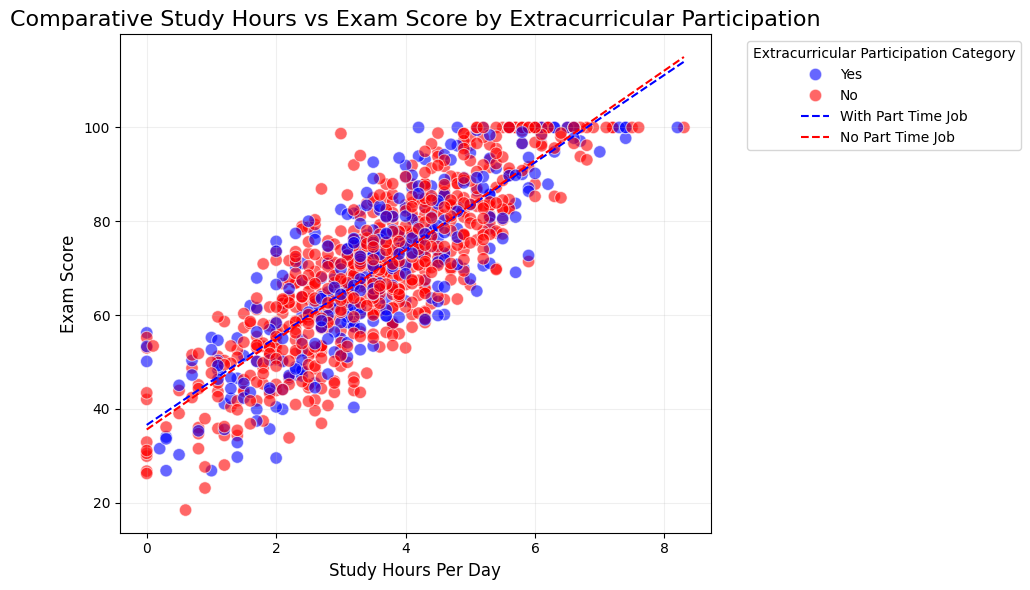

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='extracurricular_participation',
                palette={'Yes':'blue', 'No':'red'},
                alpha=0.6, s=80)

# Generar datos para las líneas de tendencia
x_range = np.linspace(df['study_hours_per_day'].min(), df['study_hours_per_day'].max(), 100)

# Graficar cada línea de tendencia
plt.plot(x_range, slopeextrayes * x_range + interceptextrayes, '--', color='blue', label='With Part Time Job')
plt.plot(x_range, interceptextrano + slopeextrano * x_range, '--', color='red', label='No Part Time Job')  # Corregí slopem -> slopef

# Personalización del gráfico
plt.title('Comparative Study Hours vs Exam Score by Extracurricular Participation', fontsize=16)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Extracurricular Participation Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:
# Dictionary to store results
results = {
    'Factor': [],
    'Category': [],
    'Slope': [],
    'Intercept': [],
    'Upper Limit': [],
    'Lower Limit': [],
    'Range': []
}

# Function to add data to dictionary
def add_results(factor, category, slope, intercept, upper, lower):
    results['Factor'].append(factor)
    results['Category'].append(category)
    results['Slope'].append(slope)
    results['Intercept'].append(intercept)
    results['Upper Limit'].append(upper)
    results['Lower Limit'].append(lower)
    results['Range'].append(upper - lower)

# Add all results (gender example)
add_results('Gender', 'Male', slopem, interceptm, upperm, lowerm)
add_results('Gender', 'Female', slopef, interceptf, upperf, lowerf)
add_results('Gender', 'Other', slopeo, intercepto, uppero, lowero)

# Add other factors (repeat for all)
add_results('Parental Education', 'High School', slopehighschool, intercepthighschool, upperhighschool, lowerhighschool)
add_results('Parental Education', 'Bachelor', slopebachelor, interceptbachelor, upperbachelor, lowerbachelor)
add_results('Parental Education', 'Master', slopemaster, interceptmaster, uppermaster, lowermaster)

add_results('Internet Quality', 'Poor', slopeinternetpoor, interceptinternetpoor, upperinternetpoor, lowerinternetpoor)
add_results('Internet Quality', 'Average', slopeinternetaverage, interceptinternetaverage, upperinternetaverage, lowerinternetaverage)
add_results('Internet Quality', 'Good', slopeinternetgood, interceptinternetgood, upperinternetgood, lowerinternetgood)

add_results('Part-Time Job', 'Yes', slopeparttimeyes, interceptparttimeyes, upperparttimeyes, lowerparttimeyes)
add_results('Part-Time Job', 'No', slopeparttimeno, interceptparttimeno, upperparttimeno, lowerparttimeno)

add_results('Diet Quality', 'Poor', slopedietpoor, interceptdietpoor, upperdietpoor, lowerdietpoor)
add_results('Diet Quality', 'Fair', slopedietfair, interceptdietfair, upperdietfair, lowerdietfair)
add_results('Diet Quality', 'Good', slopedietgood, interceptdietgood, upperdietgood, lowerdietgood)

add_results('Extracurriculars', 'Yes', slopeextrayes, interceptextrayes, upperextrayes, lowerextrayes)
add_results('Extracurriculars', 'No', slopeextrano, interceptextrano, upperextrano, lowerextrano)

# Create DataFrame
comparison_df = pd.DataFrame(results)


In [ ]:
# Calculate metrics by factor
impact_metrics = comparison_df.groupby('Factor').agg({
    'Slope': ['mean', 'std', lambda x: max(x) - min(x)],
    'Range': ['mean', 'std']
}).reset_index()

# Rename columns
impact_metrics.columns = [
    'Factor',
    'Mean Slope',
    'Slope Variability (std)',
    'Slope Range (max-min)',
    'Mean Range',
    'Range Variability (std)'
]

# Sort by impact (combined metrics)
impact_metrics['Combined Impact'] = (
    impact_metrics['Mean Slope'].abs() * 0.6 +
    impact_metrics['Slope Range (max-min)'] * 0.4
)

impact_metrics = impact_metrics.sort_values('Combined Impact', ascending=False)


In [ ]:
from IPython.display import display
display(comparison_df.sort_values('Factor'))

Factor     Category      Slope  Intercept  Upper Limit  \
11        Diet Quality         Poor   9.529260  36.258632    50.568452   
12        Diet Quality         Fair   9.289892  36.585566    52.736764   
13        Diet Quality         Good   9.730134  34.888780    50.893390   
14    Extracurriculars          Yes   9.332566  36.557226    52.170884   
15    Extracurriculars           No   9.572675  35.576070    51.874817   
0               Gender         Male   9.574414  35.755528    51.574664   
1               Gender       Female   9.352726  36.223226    52.820698   
2               Gender        Other  10.938900  31.137355    42.342529   
6     Internet Quality         Poor   9.355903  37.329689    52.538615   
7     Internet Quality      Average   9.724575  35.792206    52.348602   
8     Internet Quality         Good   9.290272  35.643283    51.218931   
3   Parental Education  High School   9.214084  36.825443    53.621588   
4   Parental Education     Bachelor   9.951763  35.390220    51.423707   
5   Parental Education       Master   9.264380  34.923675    49.735798   
9        Part-Time Job          Yes   8.533236  39.146818    55.577245   
10       Part-Time Job           No   9.794424  34.846135    50.145474   

    Lower Limit      Range  
11    21.948813  28.619639  
12    20.434368  32.302396  
13    18.884170  32.009220  
14    20.943568  31.227316  
15    19.277324  32.597493  
0     19.936392  31.638272  
1     19.625754  33.194944  
2     19.932181  22.410348  
6     22.120764  30.417851  
7     19.235809  33.112793  
8     20.067634  31.151297  
3     20.029297  33.592291  
4     19.356734  32.066974  
5     20.111552  29.624246  
9     22.716391  32.860854  
10    19.546797  30.598677

In [ ]:
impact_metrics

Factor  Mean Slope  Slope Variability (std)  \
2              Gender    9.955346                 0.858964   
5       Part-Time Job    9.163830                 0.891795   
4  Parental Education    9.476742                 0.412148   
0        Diet Quality    9.516428                 0.220401   
3    Internet Quality    9.456917                 0.234110   
1    Extracurriculars    9.452620                 0.169782   

   Slope Range (max-min)  Mean Range  Range Variability (std)  Combined Impact  
2               1.586174   29.081188                 5.829313         6.607677  
5               1.261188   31.729765                 1.599601         6.002773  
4               0.737679   31.761170                 2.001620         5.981117  
0               0.440242   30.977085                 2.046864         5.885954  
3               0.434303   31.560647                 1.393324         5.847871  
1               0.240109   31.912404                 0.968861         5.767616

In [ ]:
print("\nMost Influential Factors in Study Hours - Exam Score Relationship:")
display(impact_metrics.head(3))



Most Influential Factors in Study Hours - Exam Score Relationship:


Factor  Mean Slope  Slope Variability (std)  \
2              Gender    9.955346                 0.858964   
5       Part-Time Job    9.163830                 0.891795   
4  Parental Education    9.476742                 0.412148   

   Slope Range (max-min)  Mean Range  Range Variability (std)  Combined Impact  
2               1.586174   29.081188                 5.829313         6.607677  
5               1.261188   31.729765                 1.599601         6.002773  
4               0.737679   31.761170                 2.001620         5.981117

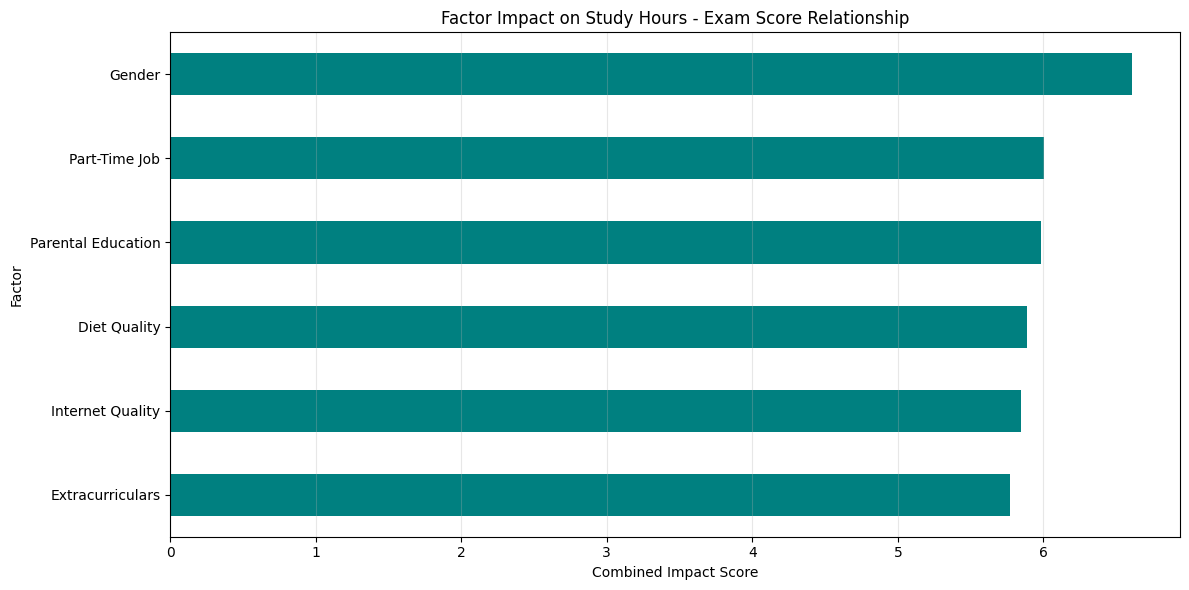

In [ ]:
plt.figure(figsize=(12, 6))
impact_metrics.set_index('Factor')['Combined Impact'].sort_values().plot(
    kind='barh',
    title='Factor Impact on Study Hours - Exam Score Relationship',
    color='teal'
)
plt.xlabel('Combined Impact Score')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score',
       'recreational_screen_time', 'recreational_screen_study_ratio',
       'score_category'],
      dtype='object')

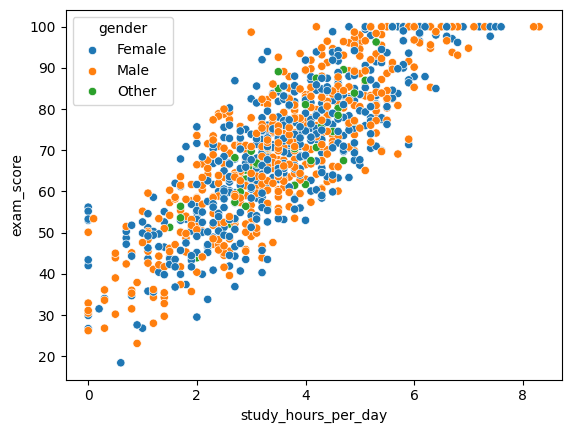

In [ ]:
sns.scatterplot(data=df,x='study_hours_per_day',y='exam_score',hue='gender')
plt.show()

<ipython-input-50-4588dd88391d>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='study_hours_per_day',hue='score_category')


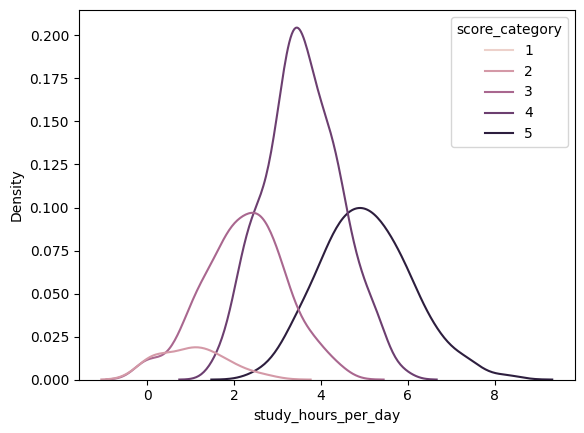

In [ ]:
sns.kdeplot(data=df,x='study_hours_per_day',hue='score_category')

plt.show()

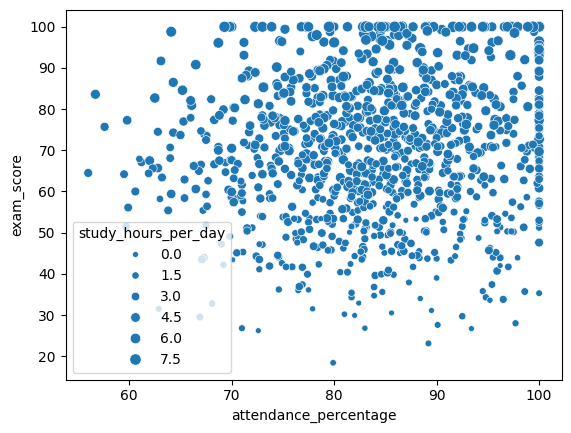

In [ ]:
sns.scatterplot(data=df,x='attendance_percentage',y='exam_score',size='study_hours_per_day')
plt.show()

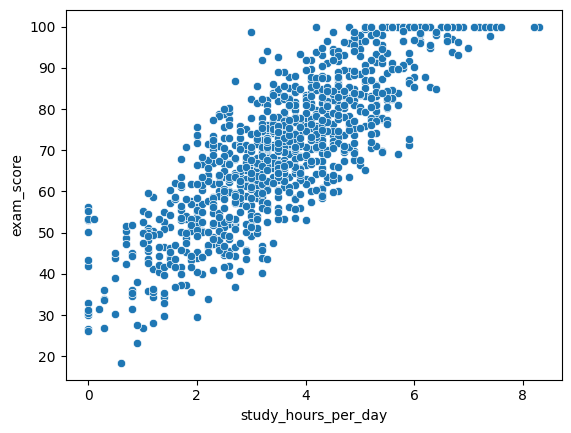

In [ ]:
sns.scatterplot(data=df,x='study_hours_per_day',y='exam_score')
plt.show()

In [ ]:
df.head()

age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  \
0                     8                           Yes        56.2   
1                     8                            No       100.0   
2                     1                            No        34.3   
3                     1                           Yes        26.8   
4                     1                            No        66.4   

   recreational_screen_time  recreational_screen_study_ratio  score_category  
0                       2.3                              inf               3  
1                       5.1                         0.739130               5  
2                       4.4                         3.142857               2  
3                       4.9                         4.900000               2  
4                       4.9                         0.980000               4

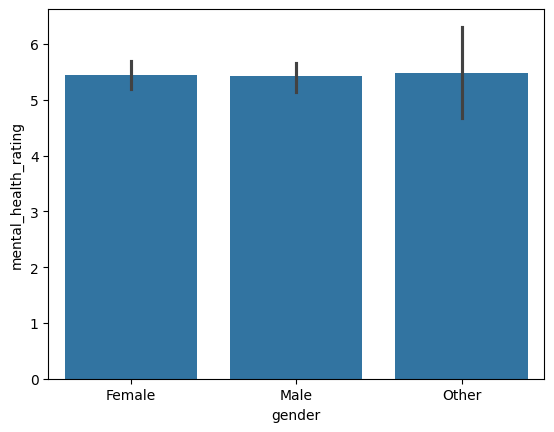

In [ ]:
sns.barplot(data=df, x='gender', y='mental_health_rating')
plt.show()

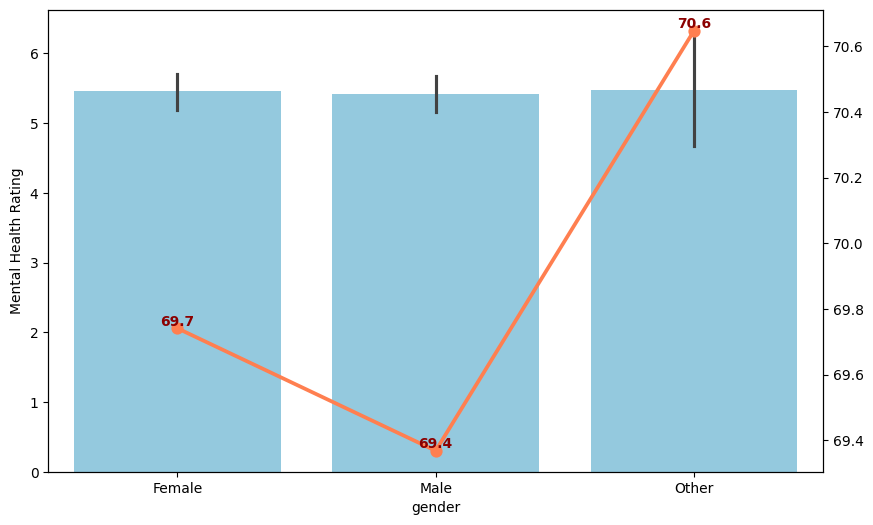

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Main plot
sns.barplot(data=df, x='gender', y='mental_health_rating', ax=ax1, color='skyblue')
ax1.set_ylabel('Mental Health Rating')

# Secondary axis
ax2 = ax1.twinx()
score_averages = df.groupby('gender')['exam_score'].mean()
sns.pointplot(x=score_averages.index, y=score_averages.values, ax=ax2, color='coral')

# Corrected annotations
for i, (gender, avg_score) in enumerate(zip(score_averages.index, score_averages.values)):
    ax2.text(i, avg_score, f'{avg_score:.1f}',  # Use i instead of gender
            ha='center', va='bottom',
            color='darkred', fontweight='bold')

plt.show()


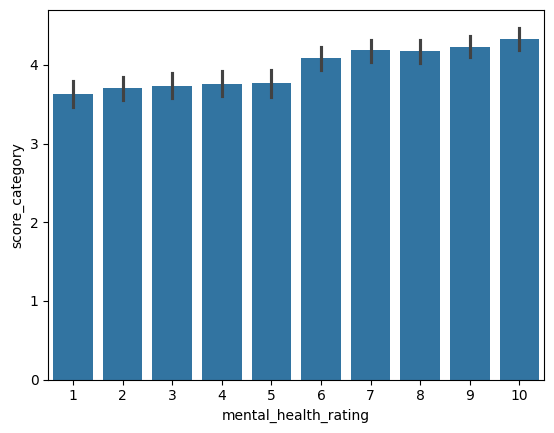

In [ ]:
sns.barplot(data=df, x='mental_health_rating', y='score_category',orient='v')
plt.show()

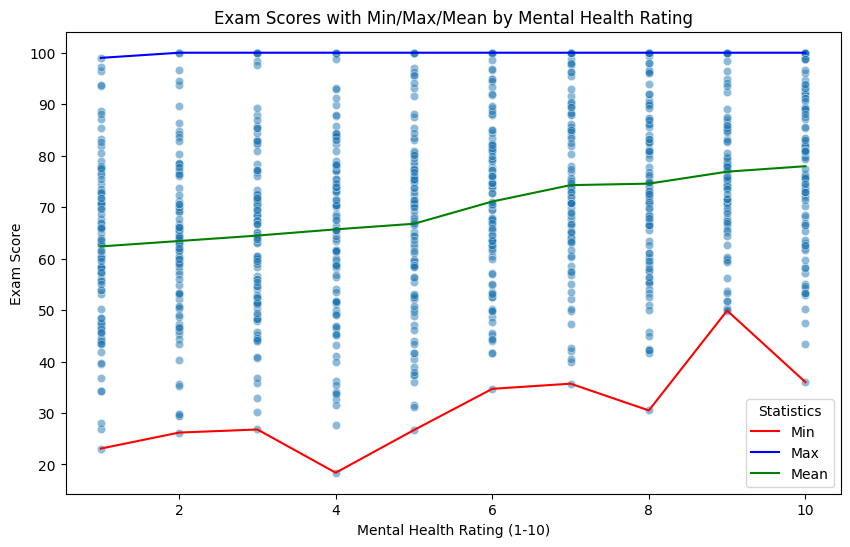

In [ ]:
# Calculate stats
stats = df.groupby('mental_health_rating')['exam_score'].agg(['min', 'max', 'mean']).reset_index()

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='mental_health_rating', y='exam_score', alpha=0.5)

# Add lines
sns.lineplot(data=stats, x='mental_health_rating', y='min', color='red', label='Min', ax=ax)
sns.lineplot(data=stats, x='mental_health_rating', y='max', color='blue', label='Max', ax=ax)
sns.lineplot(data=stats, x='mental_health_rating', y='mean', color='green', label='Mean', ax=ax)

# Formatting
plt.title('Exam Scores with Min/Max/Mean by Mental Health Rating')
plt.xlabel('Mental Health Rating (1-10)')
plt.ylabel('Exam Score')
plt.legend(title='Statistics')
plt.show()


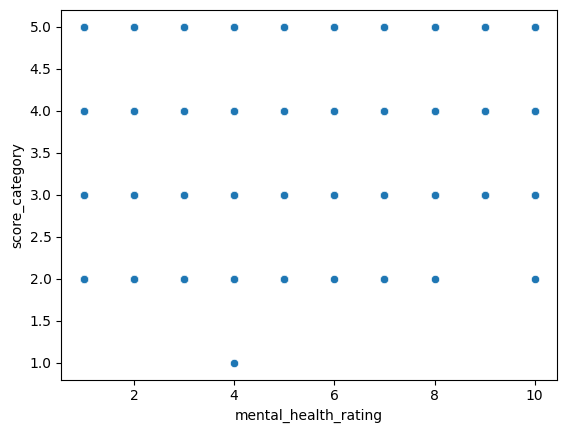

In [ ]:
sns.scatterplot(data=df, x='mental_health_rating', y='score_category')
plt.show()

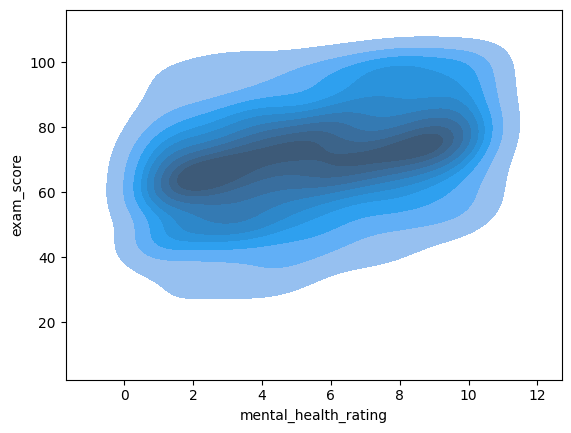

In [ ]:
sns.kdeplot(
    data=df,
    x='mental_health_rating',
    y='exam_score',
    fill=True
)
plt.show()


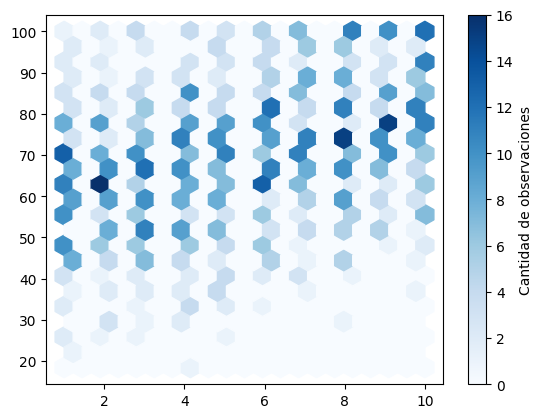

In [ ]:
plt.hexbin(
    x=df['mental_health_rating'],
    y=df['exam_score'],
    gridsize=20,
    cmap='Blues'
)
plt.colorbar(label='Cantidad de observaciones')
plt.show()

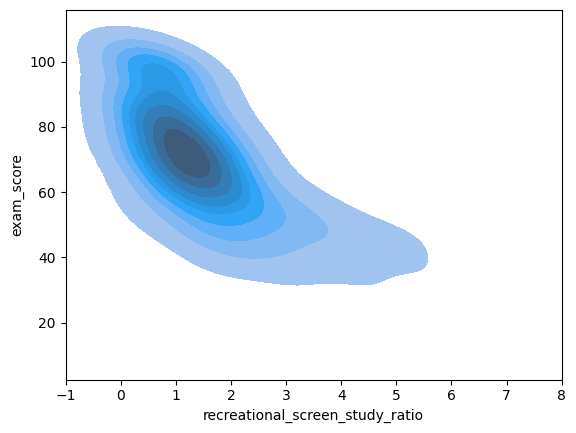

In [ ]:
sns.kdeplot(
    data=df,
    x='recreational_screen_study_ratio',
    y='exam_score',
    fill=True
)
plt.xlim(-1, 8)
plt.show()

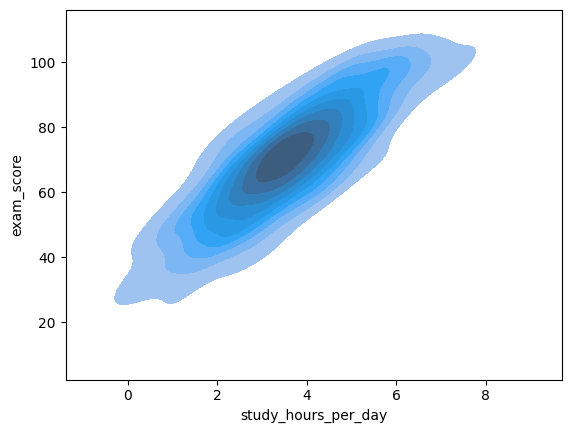

In [ ]:
sns.kdeplot(
    data=df,
    x='study_hours_per_day',
    y='exam_score',
    fill=True
)
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing
df = df.dropna()  # Drop missing values for simplicity

# Replace infinite values with a large finite number or remove rows with infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
df.dropna(inplace=True)  # Drop rows with NaN

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Assume 'exam_score' is the target column and we will predict 'score_category'
# Replace 'score_category' with your desired target column if different
X = df.drop('score_category', axis=1)  # Changed 'Performance' to 'score_category'
y = df['score_category']  # Changed 'Performance' to 'score_category'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:")
print(classification_report(y_test, y_pred_svm))

<ipython-input-63-6c107408fd15>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
<ipython-input-63-6c107408fd15>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # Drop rows with NaN
<ipython-input-63-6c107408fd15>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = l

Logistic Regression:
              precision    recall  f1-score   support

           2       0.60      0.60      0.60         5
           3       0.92      0.94      0.93        51
           4       0.99      0.97      0.98        73
           5       1.00      1.00      1.00        51

    accuracy                           0.96       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.96      0.96      0.96       180

Random Forest:
              precision    recall  f1-score   support

           2       1.00      0.80      0.89         5
           3       0.98      1.00      0.99        51
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        51

    accuracy                           0.99       180
   macro avg       1.00      0.95      0.97       180
weighted avg       0.99      0.99      0.99       180

SVM:
              precision    recall  f1-score   support

           2       1.00      0.40 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


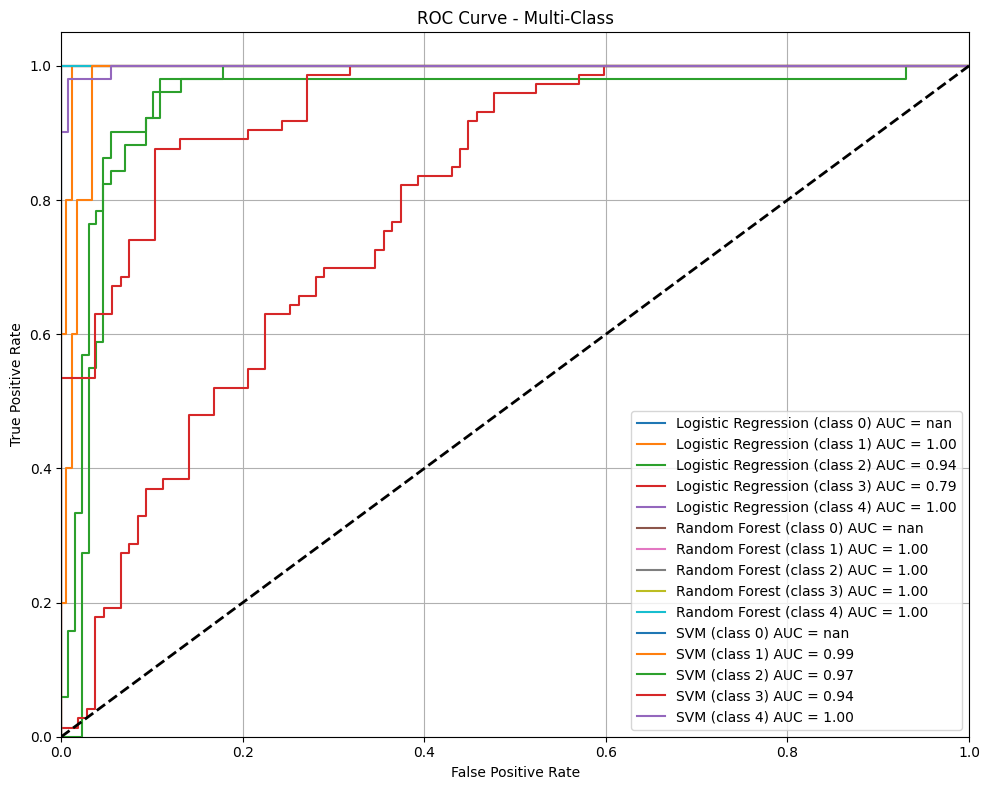

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Drop missing and infinite values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Set up features and target
X = df.drop('score_category', axis=1)
y = df['score_category']

# Binarize the output for multi-class ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression()),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "SVM": OneVsRestClassifier(SVC(probability=True))
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train_bin)
    y_score = model.predict_proba(X_test)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (class {i}) AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


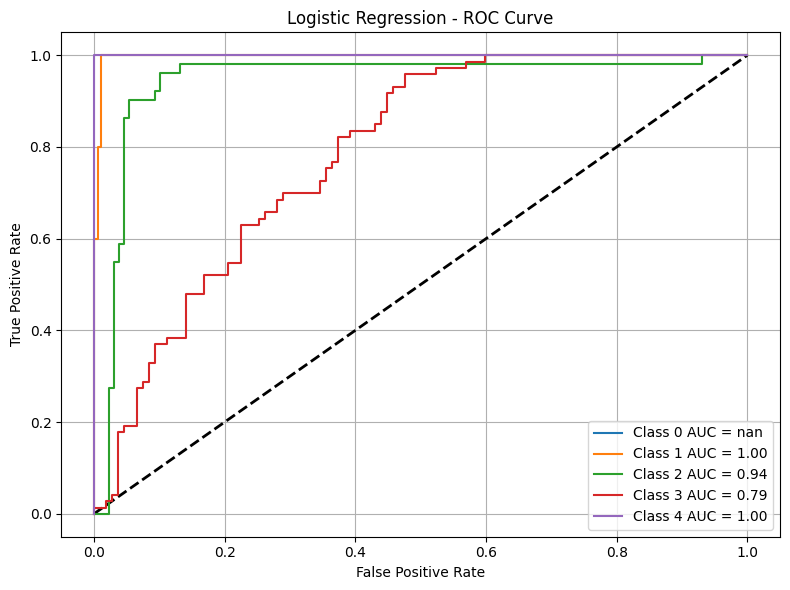

In [ ]:
# Logistic Regression
log_reg_model = OneVsRestClassifier(LogisticRegression())
log_reg_model.fit(X_train, y_train_bin)
y_score_lr = log_reg_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


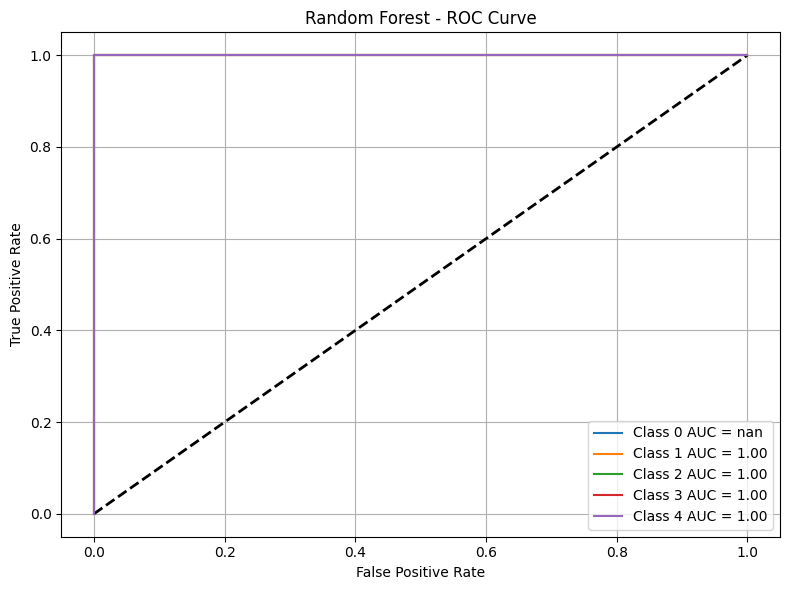

In [ ]:
# Random Forest
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train_bin)
y_score_rf = rf_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


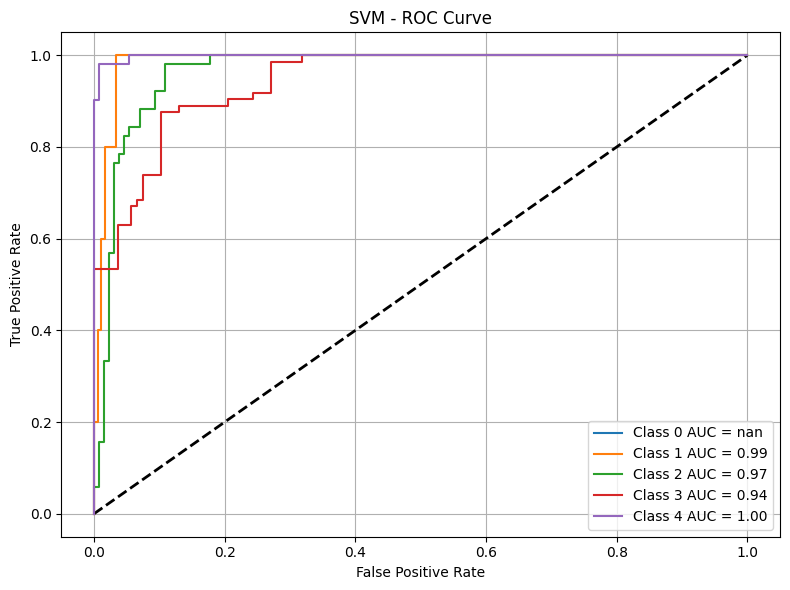

In [ ]:
# Support Vector Machine
svm_model = OneVsRestClassifier(SVC(probability=True))
svm_model.fit(X_train, y_train_bin)
y_score_svm = svm_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.title("SVM - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


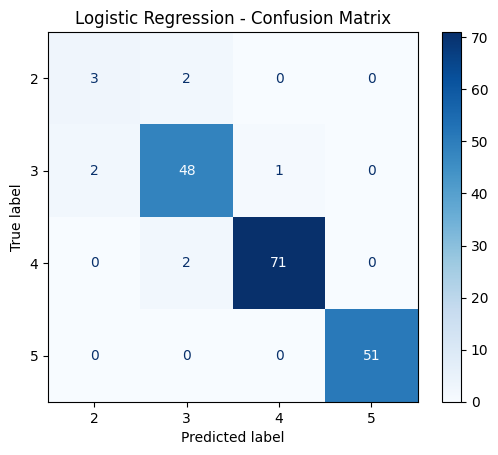

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train and predict
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Get all possible classes
all_classes = np.unique(np.concatenate((y_test, y_pred_lr)))

# Create display labels
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=all_classes) # Changed log_reg.classes_ to all_classes


disp_lr.plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()

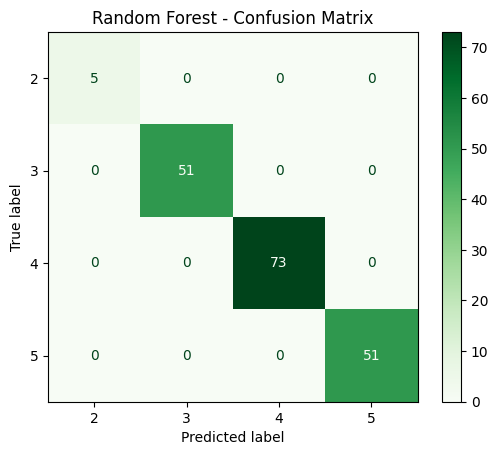

In [ ]:
# Train and predict
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Get all possible classes to ensure all predicted labels are included
all_classes_rf = np.unique(np.concatenate((y_test, y_pred_rf)))

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=all_classes_rf) # Use all_classes_rf
disp_rf.plot(cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.grid(False)
plt.show()

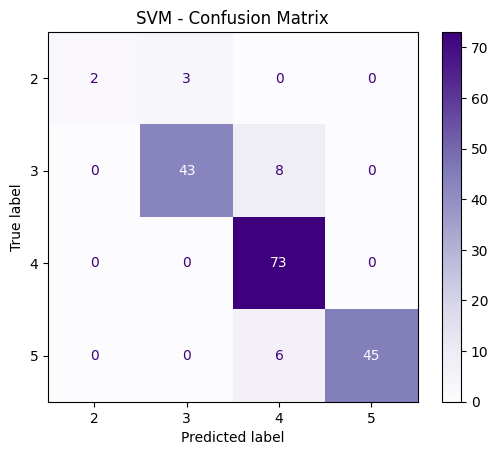

In [ ]:
# Train and predict
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Get all possible classes
all_classes = np.unique(np.concatenate((y_test, y_pred_svm)))

# Use all_classes for display_labels to match with the number of tick locations
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=all_classes)

disp_svm.plot(cmap="Purples")
plt.title("SVM - Confusion Matrix")
plt.grid(False)
plt.show()


### 📊 Final Summary and Conclusion

#### 🔍 Objective:
The goal of this project was to explore how student habits influence academic performance using the dataset **"Student Habits vs Academic Performance"**.

#### 📈 Exploratory Data Analysis (EDA) Insights:
- **Strong correlations** were observed between academic performance and certain habits such as **study time, sleep duration, and time spent on social media**.
- Students with **regular study routines and sufficient sleep** tended to perform better academically.
- **Outliers** and **missing values** were handled appropriately during preprocessing.

#### 🤖 Model Evaluation:
A classification model was trained to predict academic performance based on student habits.

Key metrics:
- **Classification Report**: Provided precision, recall, and F1-score across performance classes.
- **Confusion Matrix**: Helped visualize prediction accuracy and misclassifications.
- **ROC-AUC Score**: Evaluated the model's ability to distinguish between classes.

#### ✅ Conclusion:
Student lifestyle habits have a measurable impact on academic performance. Interventions focusing on improving study routines and promoting healthy habits could enhance student outcomes. The model built offers a reasonable prediction capability and can be further improved with more data or feature engineering.
